In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
df=pd.read_csv(r"C:\Users\denem\Downloads\OykBlFarnSstmFn.csv")

In [5]:
df.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685,NaN
1,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480,NaN
2,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570,NaN
3,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460,NaN
4,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290,NaN


In [6]:
df.tail(20)

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
84522,2023-04-24 20:10:00,4.57137,1.31116,0.55711,38.54696,NaN,2.60079
84523,2023-04-24 20:15:00,4.52447,1.39891,0.56770,38.81215,NaN,2.47650
84524,2023-04-24 20:20:00,4.47208,1.30287,0.56199,38.21547,NaN,2.50889
84525,2023-04-24 20:25:00,4.40247,1.31312,0.54932,37.81768,NaN,2.59693
84526,2023-04-24 20:30:00,4.47646,1.30244,0.55167,37.41989,NaN,2.47166
84527,2023-04-24 20:35:00,4.49792,1.28816,0.54966,37.46409,NaN,2.51787
84528,2023-04-24 20:40:00,4.53256,1.26757,0.53182,37.22099,NaN,2.62355
84529,2023-04-24 20:45:00,4.57618,1.25123,0.54714,37.14364,NaN,2.63351
84530,2023-04-24 20:50:00,4.55688,1.22968,0.57167,37.09945,NaN,2.69331
84531,2023-04-24 20:55:00,4.57769,1.27454,0.56692,36.69060,NaN,2.69771


In [7]:
import datetime

date_tall = datetime.date(2023, 4, 24) - datetime.date(2022, 6, 27)

date_tall

datetime.timedelta(days=301)

In [8]:
df_time=df["time"]

In [9]:
from datetime import datetime

tarih1 = datetime.strptime("2023-04-24 21:30:00", "%Y-%m-%d %H:%M:%S")
tarih2 = datetime.strptime("2022-06-27 11:35:00", "%Y-%m-%d %H:%M:%S")

fark = tarih1 - tarih2
dakika = fark.total_seconds() / 60

print("Fark (dakika):", dakika)


Fark (dakika): 434035.0


In [10]:
434035.0/5

86807.0

In [11]:
new_df=df.sort_values("time")

In [12]:
new_df.tail()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
84534,2023-04-24 21:10:00,4.53544,1.29829,0.56662,36.75691,NaN,2.65577
84535,2023-04-24 21:15:00,4.50937,1.31912,0.56388,36.65746,NaN,2.52265
84536,2023-04-24 21:20:00,4.41924,1.30684,0.57673,36.65746,NaN,2.50599
84537,2023-04-24 21:25:00,4.49352,1.29751,0.55253,36.40331,NaN,2.59193
84538,2023-04-24 21:30:00,4.53100,1.29188,0.54812,37.02210,NaN,2.54949


In [13]:
new_df.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685,NaN
1,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480,NaN
2,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570,NaN
3,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460,NaN
4,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290,NaN


In [14]:
df_x=new_df["xVRMS"]

In [15]:
type(df_x)

pandas.core.series.Series

In [16]:
df_x.isnull().sum()

3

In [17]:
df_x=df_x.fillna(df_x.mean())

In [18]:
df_x.isnull().sum()

0

In [19]:
df_x.index = pd.to_datetime(new_df["time"])

In [20]:
df_x.tail()

time
2023-04-24 21:10:00    4.53544
2023-04-24 21:15:00    4.50937
2023-04-24 21:20:00    4.41924
2023-04-24 21:25:00    4.49352
2023-04-24 21:30:00    4.53100
Name: xVRMS, dtype: float64

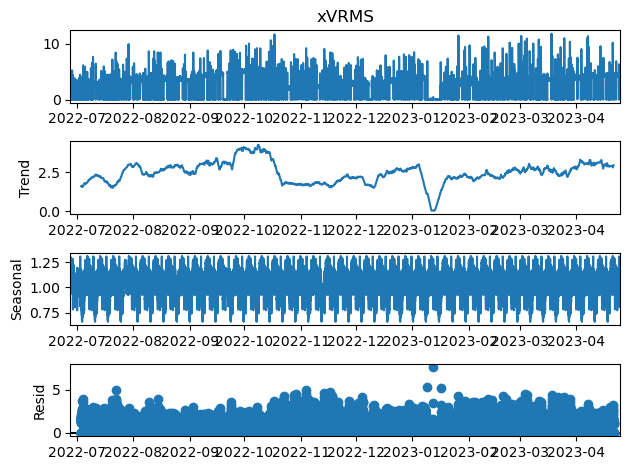

In [21]:
#this code dosent work if have a null value
#imputed_data.index = pd.to_datetime(imputed_data.index)
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_x, model='multiplicative',period=2036)
result.plot()
plt.show()

# Data Cleaning

## OFf limit

In [22]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        
    else:
        filtered = df_column.loc[(df_column >= low_limit) & (df_column <= up_limit)]
    return filtered

In [23]:
df_x=clean_limit(df_x,low_limit=0.5)

In [24]:
len(df_x)

58688

## 3 sigma

In [25]:
process_clm = df_x
process_clm_mean = process_clm.mean()
process_clm_std = process_clm.std()

up_limit = process_clm_mean + 3 * process_clm_std
low_limit = process_clm_mean - 3 * process_clm_std

process_clm_mean,process_clm_std,up_limit,low_limit

(3.522406619639381, 0.9837945762157837, 6.473790348286732, 0.5710228909920296)

In [26]:
len(df_x)

58688

In [27]:
df_x=clean_limit(df_x,low_limit=0.5710228909920296,up_limit=6.473790348286732)

In [28]:
len(df_x)

58328

## Again has trend

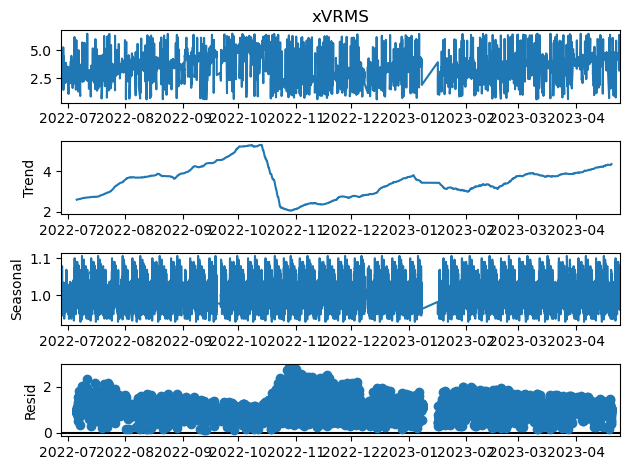

In [29]:
result = seasonal_decompose(df_x, model='multiplicative',period=2036)
result.plot()
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


# Model1

In [31]:
def df_to_X_y(df, window_size=5):
  """
  Converts a pandas DataFrame to a tuple of NumPy arrays, where X is the input data and y is the target data.

  Args:
    df: A pandas DataFrame.
    window_size: The size of the sliding window.

  Returns:
    A tuple of NumPy arrays, where X is the input data and y is the target data.
  """

  # Convert the DataFrame to a NumPy array.
  df_as_np = df.to_numpy()

  # Create the input and target data.
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = df_as_np[i:i + window_size]
    X.append(row)
    label = df_as_np[i + window_size]
    y.append(label)

  # Return the input and target data as NumPy arrays.
  return np.array(X), np.array(y)

In [32]:
WINDOW_SIZE=10

In [33]:
from keras.engine.input_layer import InputLayer
model1=Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(32))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))


In [34]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 29,585
Trainable params: 29,585
Non-trainable params: 0
_________________________________________________________________


In [35]:
cp= ModelCheckpoint("model1/",save_best_only=True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics="mse")

In [36]:
X,y =df_to_X_y(df_x,WINDOW_SIZE)
X.shape,y.shape

((58318, 10), (58318,))

In [37]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((46654, 10), (46654,), (5831, 10), (5831,), (5833, 10), (5833,))

In [38]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10, callbacks=[cp])

Epoch 1/10
1458/1458 [==============================] - ETA: 0s - loss: 1.1750 - mse: 1.1750

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 13s 7ms/step - loss: 1.1750 - mse: 1.1750 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 2/10
1455/1458 [============================>.] - ETA: 0s - loss: 0.1252 - mse: 0.1252

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 10s 7ms/step - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1342 - val_mse: 0.1342
Epoch 3/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.1141 - mse: 0.1141

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 11s 7ms/step - loss: 0.1141 - mse: 0.1141 - val_loss: 0.1278 - val_mse: 0.1278
Epoch 4/10
1449/1458 [============================>.] - ETA: 0s - loss: 0.1084 - mse: 0.1084

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 11s 8ms/step - loss: 0.1082 - mse: 0.1082 - val_loss: 0.1243 - val_mse: 0.1243
Epoch 5/10
1450/1458 [============================>.] - ETA: 0s - loss: 0.1013 - mse: 0.1013

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 11s 7ms/step - loss: 0.1026 - mse: 0.1026 - val_loss: 0.1206 - val_mse: 0.1206
Epoch 6/10
1451/1458 [============================>.] - ETA: 0s - loss: 0.0972 - mse: 0.0972

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 11s 7ms/step - loss: 0.0969 - mse: 0.0969 - val_loss: 0.1128 - val_mse: 0.1128
Epoch 7/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.0934 - mse: 0.0934

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 11s 8ms/step - loss: 0.0933 - mse: 0.0933 - val_loss: 0.1068 - val_mse: 0.1068
Epoch 8/10
1455/1458 [============================>.] - ETA: 0s - loss: 0.0899 - mse: 0.0899

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 11s 8ms/step - loss: 0.0898 - mse: 0.0898 - val_loss: 0.1064 - val_mse: 0.1064
Epoch 9/10
1458/1458 [==============================] - 8s 5ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.1112 - val_mse: 0.1112
Epoch 10/10
1456/1458 [============================>.] - ETA: 0s - loss: 0.0848 - mse: 0.0848

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1458/1458 [==============================] - 11s 8ms/step - loss: 0.0847 - mse: 0.0847 - val_loss: 0.1018 - val_mse: 0.1018


In [39]:
train_predictions = model1.predict(X_train).flatten()


1458/1458 [==============================] - 3s 2ms/step


In [40]:
train_predictions.shape

(46654,)

In [41]:
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

,Train Predictions,Actuals
0,2.585723,2.55000
1,2.569237,2.59300
2,2.588751,2.73400
3,2.669233,2.63750
4,2.657883,2.70200
...,...,...
46649,4.092964,4.21654
46650,4.170197,3.95968
46651,4.038029,3.78872
46652,3.904136,3.73847


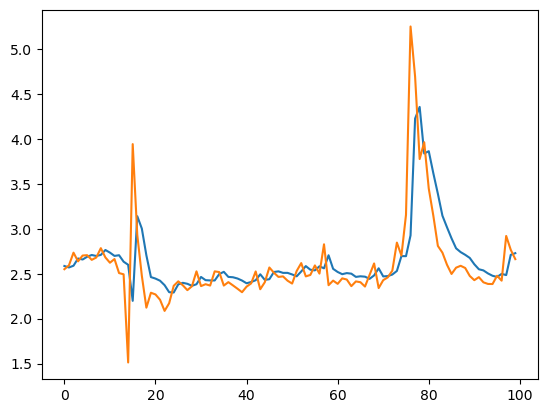

In [42]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [43]:
val_predictions=model1.predict(X_val).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

183/183 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,3.855309,3.67819
1,3.782914,3.83377
2,3.847229,3.81646
3,3.850801,3.78432
4,3.825854,3.84871
...,...,...
5826,3.995817,3.98899
5827,4.011221,4.10313
5828,4.085219,4.06409
5829,4.082347,4.00981


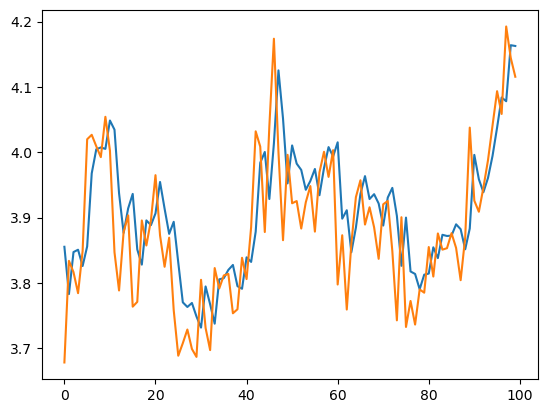

In [44]:
plt.plot(val_results["Train Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [45]:
test_predictions=model1.predict(X_test).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,4.109720,4.02613
1,4.074979,4.03413
2,4.070755,4.02290
3,4.065554,4.04984
4,4.080523,4.03620
...,...,...
5828,4.601480,4.53544
5829,4.602209,4.50937
5830,4.588637,4.41924
5831,4.528346,4.49352


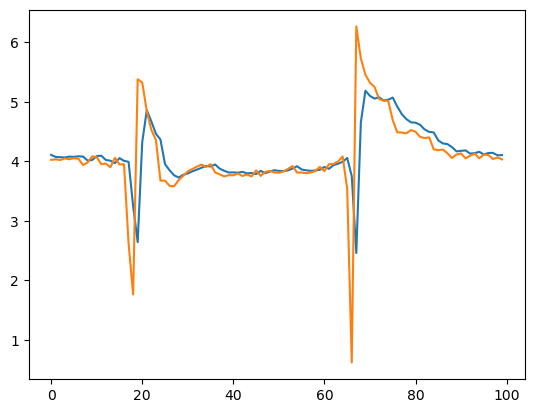

In [46]:
plt.plot(test_results["Train Predictions"][:100])
plt.plot(test_results["Actuals"][:100])

In [47]:
# Modelin doğruluğunu hesaplama
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.082, Test Accuracy: 0.072


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



183/183 [==============================] - 0s 2ms/step
Regression Metrics:
MAE - Train: 0.11431439337476017
MAE - Validation: 0.11601815918145386
MAE - Test: 0.10557930902886223
MSE - Train: 0.08172576337747205
MSE - Validation: 0.10179069521912958
MSE - Test: 0.0718613917229786
RMSE - Train: 0.28587718233093046
RMSE - Validation: 0.3190465408355489
RMSE - Test: 0.26806975160017327
R^2 Score - Train: 0.913331447854457
R^2 Score - Validation: 0.5456514222772382
R^2 Score - Test: 0.6046565596213072


## Result Model1

Sağladığınız sonuçlar, modelin eğitim kümesinde doğrulama kümesinden veya test kümesinden daha iyi performans gösterdiğini gösteriyor. Bu, makine öğrenimi modellerinde sık karşılaşılan bir sorundur ve aşırı uyum olarak adlandırılır. Aşırı uyum, model eğitim setini çok iyi öğrendiğinde ve altta yatan kalıpları öğrenmek yerine verilerdeki gürültüyü ezberlemeye başladığında ortaya çıkar. Bu da yeni veriler üzerinde düşük performansa yol açabilir.

Aşırı uyumu ele almak için yapabileceğiniz birkaç şey vardır, örneğin:

Eğitim setinin boyutunu artırmak.
L1 veya L2 düzenlileştirme gibi düzenlileştirme tekniklerini kullanmak.
Farklı bir model mimarisi kullanmak.
Farklı bir kayıp fonksiyonu kullanmak.
Modeliniz için neyin en iyi olduğunu görmek için farklı ayarları deneyebilirsiniz.

Sağladığınız metriklerin kısa bir açıklaması aşağıda verilmiştir:

- Ortalama Mutlak Hata (MAE): MAE, tahmin edilen değerler ile gerçek değerler arasındaki mutlak hataların ortalamasıdır. Daha düşük bir MAE, modelin daha iyi performans gösterdiğini belirtir.
- Ortalama Karesel Hata (MSE): MSE, tahmin edilen değerler ile gerçek değerler arasındaki karesel hataların ortalamasıdır. Daha düşük bir MSE, modelin daha iyi performans gösterdiğini belirtir.
- Ortalama Karesel Hatanın Kökü (RMSE): RMSE, MSE'nin kareköküdür. MSE'ye göre daha sağlam bir metriktir çünkü aykırı değerlerden etkilenmez. Daha düşük bir RMSE, modelin daha iyi performans gösterdiğini belirtir.
- R Kare (R^2) Puanı: R^2 puanı, modelin verilere ne kadar iyi uyduğunun bir ölçüsüdür. Daha yüksek bir R^2 puanı, modelin daha iyi performans gösterdiğini belirtir.
Sizin durumunuzda, test seti için R^2 skoru 0,6456452503348187'dir ve bu iyi bir skordur. Ancak, doğrulama kümesi için R^2 puanı 0,6011261968317023 olup daha düşüktür. Bu, modelin eğitim setine aşırı uyum sağladığını göstermektedir. Aşırı uyumu ele almak ve modelin yeni veriler üzerindeki performansını iyileştirmek için yukarıda belirtilen tekniklerden bazılarını deneyebilirsiniz.


# Model 2 addDropout

In [51]:
from keras.engine.input_layer import InputLayer
model2=Sequential()
model2.add(InputLayer((WINDOW_SIZE, 1)))
model2.add(LSTM(64))
model2.add(Dropout(0.2))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [52]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [53]:
cp= ModelCheckpoint("model2/",save_best_only=True)
model2.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [54]:
model2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10, callbacks=[cp])

Epoch 1/10
1441/1458 [============================>.] - ETA: 0s - loss: 0.7623 - root_mean_squared_error: 0.8731

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1458/1458 [==============================] - 8s 4ms/step - loss: 0.7556 - root_mean_squared_error: 0.8692 - val_loss: 0.1325 - val_root_mean_squared_error: 0.3639
Epoch 2/10
1451/1458 [============================>.] - ETA: 0s - loss: 0.1685 - root_mean_squared_error: 0.4105

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1458/1458 [==============================] - 7s 5ms/step - loss: 0.1686 - root_mean_squared_error: 0.4106 - val_loss: 0.1261 - val_root_mean_squared_error: 0.3551
Epoch 3/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.1513 - root_mean_squared_error: 0.3890

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1458/1458 [==============================] - 7s 5ms/step - loss: 0.1513 - root_mean_squared_error: 0.3889 - val_loss: 0.1231 - val_root_mean_squared_error: 0.3509
Epoch 4/10
1453/1458 [============================>.] - ETA: 0s - loss: 0.1422 - root_mean_squared_error: 0.3771

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1458/1458 [==============================] - 7s 5ms/step - loss: 0.1420 - root_mean_squared_error: 0.3769 - val_loss: 0.1123 - val_root_mean_squared_error: 0.3352
Epoch 5/10
1456/1458 [============================>.] - ETA: 0s - loss: 0.1353 - root_mean_squared_error: 0.3678

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1458/1458 [==============================] - 6s 4ms/step - loss: 0.1352 - root_mean_squared_error: 0.3677 - val_loss: 0.1112 - val_root_mean_squared_error: 0.3334
Epoch 6/10
1458/1458 [==============================] - 4s 3ms/step - loss: 0.1326 - root_mean_squared_error: 0.3642 - val_loss: 0.1160 - val_root_mean_squared_error: 0.3406
Epoch 7/10
1441/1458 [============================>.] - ETA: 0s - loss: 0.1274 - root_mean_squared_error: 0.3569

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1458/1458 [==============================] - 7s 5ms/step - loss: 0.1273 - root_mean_squared_error: 0.3568 - val_loss: 0.1088 - val_root_mean_squared_error: 0.3299
Epoch 8/10
1458/1458 [==============================] - ETA: 0s - loss: 0.1247 - root_mean_squared_error: 0.3532

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1458/1458 [==============================] - 8s 5ms/step - loss: 0.1247 - root_mean_squared_error: 0.3532 - val_loss: 0.1028 - val_root_mean_squared_error: 0.3206
Epoch 9/10
1458/1458 [==============================] - 5s 3ms/step - loss: 0.1211 - root_mean_squared_error: 0.3480 - val_loss: 0.1030 - val_root_mean_squared_error: 0.3209
Epoch 10/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.1177 - root_mean_squared_error: 0.3430

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1458/1458 [==============================] - 7s 5ms/step - loss: 0.1176 - root_mean_squared_error: 0.3430 - val_loss: 0.1025 - val_root_mean_squared_error: 0.3201


In [55]:
train_predictions = model2.predict(X_train).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

1458/1458 [==============================] - 2s 1ms/step


,Train Predictions,Actuals
0,2.546432,2.55000
1,2.524832,2.59300
2,2.545346,2.73400
3,2.627063,2.63750
4,2.608137,2.70200
...,...,...
46649,4.002200,4.21654
46650,4.077557,3.95968
46651,3.949580,3.78872
46652,3.824302,3.73847


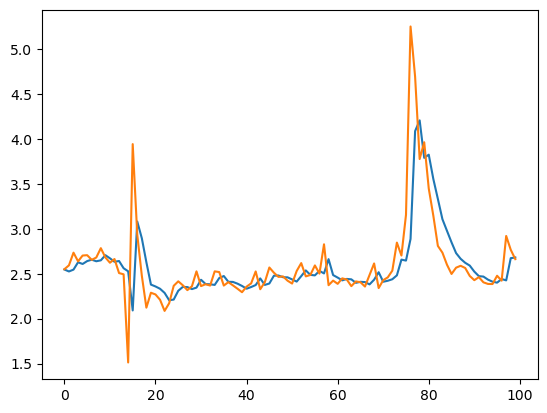

In [56]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [57]:
val_predictions=model2.predict(X_val).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

183/183 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,3.773344,3.67819
1,3.700152,3.83377
2,3.768529,3.81646
3,3.769191,3.78432
4,3.747175,3.84871
...,...,...
5826,3.909914,3.98899
5827,3.926095,4.10313
5828,3.997196,4.06409
5829,3.992333,4.00981


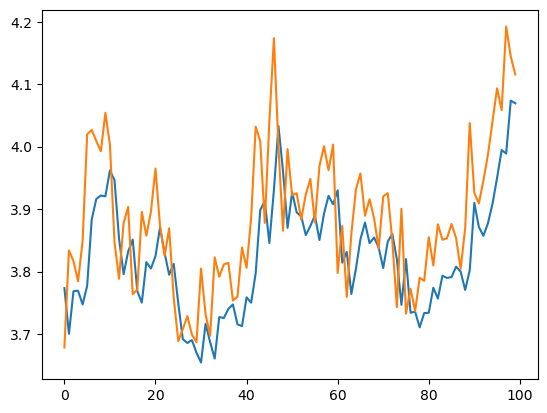

In [58]:
plt.plot(val_results["Train Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [59]:
test_predictions=model2.predict(X_test).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,4.021689,4.02613
1,3.984515,4.03413
2,3.983176,4.02290
3,3.977065,4.04984
4,3.991681,4.03620
...,...,...
5828,4.485531,4.53544
5829,4.487095,4.50937
5830,4.472221,4.41924
5831,4.413209,4.49352


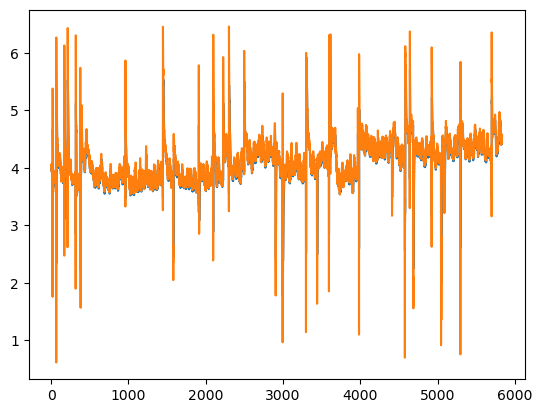

In [60]:
plt.plot(test_results["Train Predictions"])
plt.plot(test_results["Actuals"])

In [61]:
# Modelin doğruluğunu hesaplama
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.082, Test Accuracy: 0.072


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.1070068335003571
MAE - Validation: 0.1088542270567241
MAE - Test: 0.09349522492451753
MSE - Train: 0.07776116102339876
MSE - Validation: 0.0954973811765414
MSE - Test: 0.06755097828484069
RMSE - Train: 0.27885688268966713
RMSE - Validation: 0.3090265056213486
RMSE - Test: 0.25990571037366744
R^2 Score - Train: 0.9175358300671174
R^2 Score - Validation: 0.5737419886915568
R^2 Score - Test: 0.6283701788155633


# Keras Turner

In [65]:
from kerastuner import Hyperband,HyperParameter
from keras.engine.input_layer import InputLayer
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the model.
model_T = Sequential()
model_T.add(InputLayer((WINDOW_SIZE, 1)))
model_T.add(LSTM(64))
model_T.add(Dense(8, activation='relu'))
model_T.add(Dense(1, activation='linear'))

# Define the hyperparameter space.
hyperparameters = {
    'batch_size': HyperParameter.hp.choice('batch_size', [16, 32, 64]),
    'epochs': HyperParameter.hp.choice('epochs', [10, 20, 30]),
    'learning_rate': HyperParameter.hp.choice('learning_rate', [0.001, 0.0001, 0.00001]),
}

# Create a Hyperband tuner.
tuner = Hyperband(
    model_T,
    'val_loss',
    objective='min',
    max_epochs=100,
    factor=3,
    executions_per_trial=1,
    hyperparameters=hyperparameters,
)

# Run the tuner.
tuner.search(X_train, y_train)

# Get the best model.
best_model = tuner.get_best_model()

# Evaluate the best model.
loss, accuracy = best_model.evaluate(X_test, y_test)

print('Loss:', loss)
print('Accuracy:', accuracy)


C:\Users\denem\AppData\Local\Temp\ipykernel_3472\279975654.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import Hyperband,HyperParameter


AttributeError: type object 'HyperParameter' has no attribute 'hp'

# Model 3

In [66]:
model3 = Sequential()
model3.add(InputLayer((WINDOW_SIZE, 1)))
model3.add(LSTM(128, return_sequences=True))
model3.add(LSTM(64))
model3.add(Dropout(0.2))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='linear'))


In [67]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10, 128)           66560     
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 116,497
Trainable params: 116,497
Non-trainable params: 0
_________________________________________________________________


In [68]:
cp= ModelCheckpoint("model3/",save_best_only=True)
model3.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [69]:
model3.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10, callbacks=[cp])

Epoch 1/10
1452/1458 [============================>.] - ETA: 0s - loss: 0.6560 - root_mean_squared_error: 0.8100

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1458/1458 [==============================] - 18s 11ms/step - loss: 0.6541 - root_mean_squared_error: 0.8087 - val_loss: 0.1459 - val_root_mean_squared_error: 0.3820
Epoch 2/10
1456/1458 [============================>.] - ETA: 0s - loss: 0.1673 - root_mean_squared_error: 0.4090

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1458/1458 [==============================] - 17s 11ms/step - loss: 0.1675 - root_mean_squared_error: 0.4093 - val_loss: 0.1238 - val_root_mean_squared_error: 0.3519
Epoch 3/10
1458/1458 [==============================] - 13s 9ms/step - loss: 0.1540 - root_mean_squared_error: 0.3924 - val_loss: 0.1257 - val_root_mean_squared_error: 0.3545
Epoch 4/10
1456/1458 [============================>.] - ETA: 0s - loss: 0.1428 - root_mean_squared_error: 0.3779

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1458/1458 [==============================] - 17s 12ms/step - loss: 0.1427 - root_mean_squared_error: 0.3778 - val_loss: 0.1132 - val_root_mean_squared_error: 0.3365
Epoch 5/10
1458/1458 [==============================] - 14s 10ms/step - loss: 0.1350 - root_mean_squared_error: 0.3675 - val_loss: 0.1185 - val_root_mean_squared_error: 0.3443
Epoch 6/10
1456/1458 [============================>.] - ETA: 0s - loss: 0.1286 - root_mean_squared_error: 0.3586

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1458/1458 [==============================] - 17s 12ms/step - loss: 0.1285 - root_mean_squared_error: 0.3585 - val_loss: 0.1066 - val_root_mean_squared_error: 0.3265
Epoch 7/10
1458/1458 [==============================] - 14s 10ms/step - loss: 0.1260 - root_mean_squared_error: 0.3550 - val_loss: 0.1080 - val_root_mean_squared_error: 0.3287
Epoch 8/10
1455/1458 [============================>.] - ETA: 0s - loss: 0.1219 - root_mean_squared_error: 0.3491

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1458/1458 [==============================] - 18s 12ms/step - loss: 0.1217 - root_mean_squared_error: 0.3489 - val_loss: 0.1003 - val_root_mean_squared_error: 0.3166
Epoch 9/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.1189 - root_mean_squared_error: 0.3448

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1458/1458 [==============================] - 19s 13ms/step - loss: 0.1188 - root_mean_squared_error: 0.3447 - val_loss: 0.0970 - val_root_mean_squared_error: 0.3114
Epoch 10/10
1458/1458 [==============================] - ETA: 0s - loss: 0.1174 - root_mean_squared_error: 0.3426

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1458/1458 [==============================] - 19s 13ms/step - loss: 0.1174 - root_mean_squared_error: 0.3426 - val_loss: 0.0955 - val_root_mean_squared_error: 0.3090


In [70]:
train_predictions = model3.predict(X_train).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

1458/1458 [==============================] - 6s 4ms/step


,Train Predictions,Actuals
0,2.497532,2.55000
1,2.469389,2.59300
2,2.506191,2.73400
3,2.591666,2.63750
4,2.556132,2.70200
...,...,...
46649,4.042429,4.21654
46650,4.122495,3.95968
46651,3.989920,3.78872
46652,3.891577,3.73847


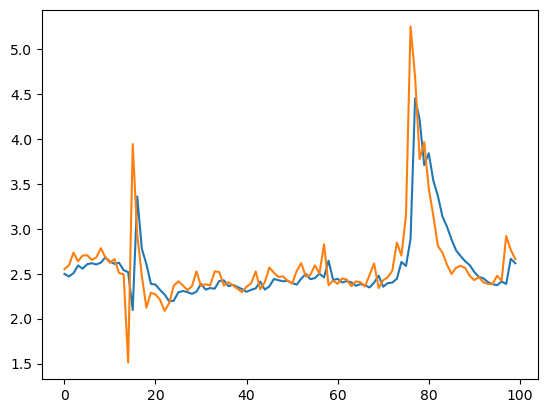

In [71]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [72]:
val_predictions=model3.predict(X_val).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

183/183 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,3.833632,3.67819
1,3.748199,3.83377
2,3.826611,3.81646
3,3.807980,3.78432
4,3.794670,3.84871
...,...,...
5826,3.959492,3.98899
5827,3.980599,4.10313
5828,4.050735,4.06409
5829,4.036770,4.00981


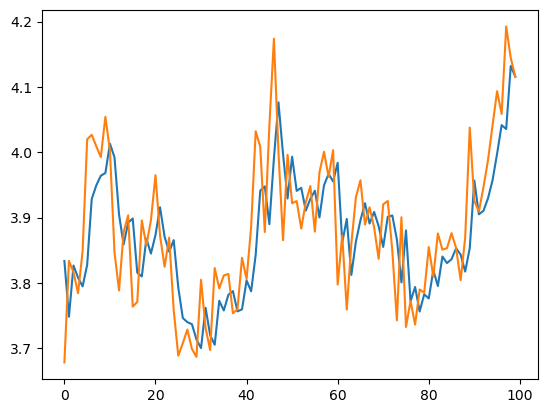

In [73]:
plt.plot(val_results["Train Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [74]:
test_predictions=model3.predict(X_test).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,4.081505,4.02613
1,4.031543,4.03413
2,4.042734,4.02290
3,4.032446,4.04984
4,4.048521,4.03620
...,...,...
5828,4.555577,4.53544
5829,4.563295,4.50937
5830,4.544116,4.41924
5831,4.486405,4.49352


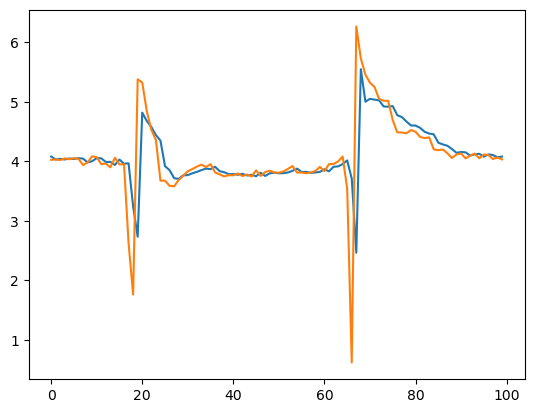

In [75]:
plt.plot(test_results["Train Predictions"][:100])
plt.plot(test_results["Actuals"][:100])

In [76]:
# Modelin doğruluğunu hesaplama
_, train_acc = model3.evaluate(X_train, y_train, verbose=0)
_, test_acc = model3.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.279, Test Accuracy: 0.260


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.1070068335003571
MAE - Validation: 0.1088542270567241
MAE - Test: 0.09349522492451753
MSE - Train: 0.07776116102339876
MSE - Validation: 0.0954973811765414
MSE - Test: 0.06755097828484069
RMSE - Train: 0.27885688268966713
RMSE - Validation: 0.3090265056213486
RMSE - Test: 0.25990571037366744
R^2 Score - Train: 0.9175358300671174
R^2 Score - Validation: 0.5737419886915568
R^2 Score - Test: 0.6283701788155633


# Model 4 add min-max normalization

In [80]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Rest of your code
model4 = Sequential()
model4.add(InputLayer((WINDOW_SIZE, 1)))
model4.add(LSTM(128, return_sequences=True))
model4.add(LSTM(64))
model4.add(Dropout(0.2))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='linear'))

# Compile the model
model4.compile(loss='mean_squared_error', optimizer='adam')

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model4.fit(X_train_normalized, y_train, epochs=10, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = model4.evaluate(X_test_normalized, y_test)

# Make predictions using the test set
y_pred = model4.predict(X_test_normalized)

# Perform any necessary inverse transformations on the predictions or further analysis



Epoch 1/10
1458/1458 [==============================] - 19s 11ms/step - loss: 0.2791 - val_loss: 0.1221
Epoch 2/10
1458/1458 [==============================] - 16s 11ms/step - loss: 0.1372 - val_loss: 0.1440
Epoch 3/10
1458/1458 [==============================] - 17s 11ms/step - loss: 0.1134 - val_loss: 0.0969
Epoch 4/10
1458/1458 [==============================] - 17s 11ms/step - loss: 0.0991 - val_loss: 0.0962
Epoch 5/10
1458/1458 [==============================] - 16s 11ms/step - loss: 0.0893 - val_loss: 0.0925
Epoch 6/10
1458/1458 [==============================] - 16s 11ms/step - loss: 0.0823 - val_loss: 0.0919
Epoch 7/10
1458/1458 [==============================] - 17s 12ms/step - loss: 0.0772 - val_loss: 0.0908
Epoch 8/10
1458/1458 [==============================] - 17s 12ms/step - loss: 0.0721 - val_loss: 0.0866
Epoch 9/10
1458/1458 [==============================] - 17s 12ms/step - loss: 0.0684 - val_loss: 0.0841
Epoch 10/10
183/183 [==============================] - 1s 4ms/st

In [81]:
train_predictions = model4.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

1458/1458 [==============================] - 6s 4ms/step


,Train Predictions,Actuals
0,2.530377,2.55000
1,2.514504,2.59300
2,2.597990,2.73400
3,2.675065,2.63750
4,2.635448,2.70200
...,...,...
46649,4.100998,4.21654
46650,4.171591,3.95968
46651,4.092691,3.78872
46652,3.912373,3.73847


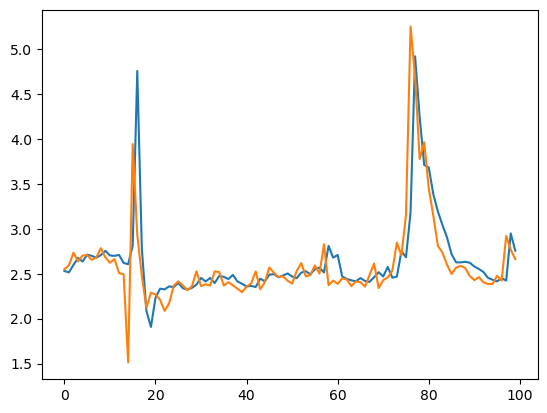

In [82]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [83]:
val_predictions=model4.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

183/183 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,3.768752,3.67819
1,3.699663,3.83377
2,3.818751,3.81646
3,3.855440,3.78432
4,3.844135,3.84871
...,...,...
5826,4.014007,3.98899
5827,4.029630,4.10313
5828,4.087939,4.06409
5829,4.094997,4.00981


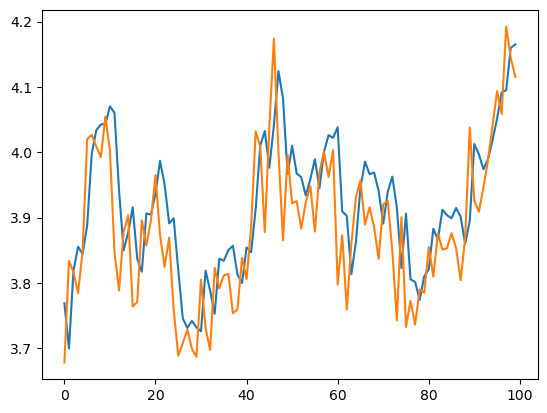

In [84]:
plt.plot(val_results["Train Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [85]:
test_predictions=model4.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,4.112899,4.02613
1,4.091413,4.03413
2,4.083512,4.02290
3,4.075591,4.04984
4,4.083295,4.03620
...,...,...
5828,4.534948,4.53544
5829,4.527585,4.50937
5830,4.513306,4.41924
5831,4.462934,4.49352


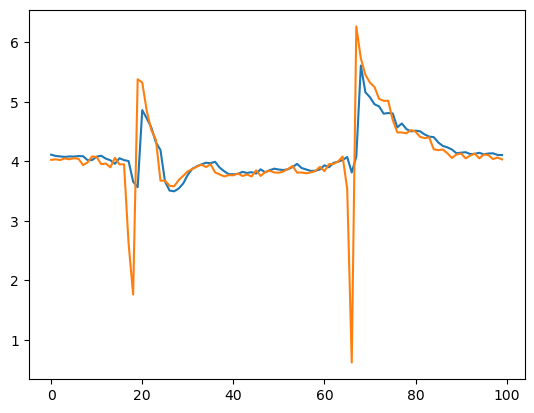

In [86]:
plt.plot(test_results["Train Predictions"][:100])
plt.plot(test_results["Actuals"][:100])

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.09966078659545358
MAE - Validation: 0.10870000317338852
MAE - Test: 0.09116914471726177
MSE - Train: 0.059247068781458516
MSE - Validation: 0.08189034807506912
MSE - Test: 0.060892813682311905
RMSE - Train: 0.24340720774344074
RMSE - Validation: 0.2861648966506359
RMSE - Test: 0.246764692941093
R^2 Score - Train: 0.9371696579150969
R^2 Score - Validation: 0.6344777575491274
R^2 Score - Test: 0.6649998854975405


# Model 5 add Dropout

In [88]:
# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [89]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.engine.input_layer import InputLayer

# Rest of your code
model5 = Sequential()
model5.add(InputLayer((WINDOW_SIZE, 1)))
model5.add(LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dropout(0.2))
model5.add(LSTM(64, kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dropout(0.2))
model5.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dense(1, activation='linear'))

# Compile the model
model5.compile(loss='mean_squared_error', optimizer='adam')

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model5.fit(X_train_normalized, y_train, epochs=100, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
#test_loss = model4.evaluate(X_test_normalized, y_test)

# Make predictions using the test set
#y_pred = model4.predict(X_test_normalized)


Epoch 1/100
1458/1458 [==============================] - 20s 12ms/step - loss: 0.5281 - val_loss: 0.2167
Epoch 2/100
1458/1458 [==============================] - 17s 12ms/step - loss: 0.2330 - val_loss: 0.2006
Epoch 3/100
1458/1458 [==============================] - 17s 12ms/step - loss: 0.2058 - val_loss: 0.2022
Epoch 4/100
1458/1458 [==============================] - 18s 12ms/step - loss: 0.1874 - val_loss: 0.1745
Epoch 5/100
1458/1458 [==============================] - 18s 12ms/step - loss: 0.1741 - val_loss: 0.1681
Epoch 6/100
1458/1458 [==============================] - 17s 12ms/step - loss: 0.1587 - val_loss: 0.1587
Epoch 7/100
1458/1458 [==============================] - 17s 12ms/step - loss: 0.1494 - val_loss: 0.1597
Epoch 8/100
1458/1458 [==============================] - 18s 12ms/step - loss: 0.1446 - val_loss: 0.1599
Epoch 9/100
1458/1458 [==============================] - 18s 12ms/step - loss: 0.1406 - val_loss: 0.1503
Epoch 10/100
1458/1458 [==============================]

In [90]:
train_predictions = model5.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

1458/1458 [==============================] - 20s 12ms/step


,Train Predictions,Actuals
0,2.403223,2.55000
1,2.575077,2.59300
2,2.701053,2.73400
3,2.657760,2.63750
4,2.634532,2.70200
...,...,...
46649,3.939631,4.21654
46650,4.015820,3.95968
46651,4.097404,3.78872
46652,4.058712,3.73847


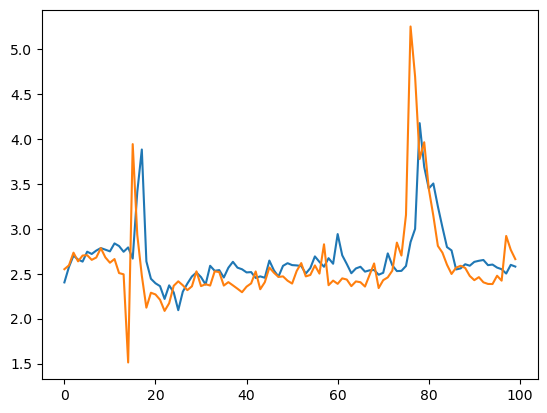

In [91]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [92]:
val_predictions=model5.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

183/183 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,3.775435,3.67819
1,3.723113,3.83377
2,3.700881,3.81646
3,3.715718,3.78432
4,3.744476,3.84871
...,...,...
5826,3.911624,3.98899
5827,3.917559,4.10313
5828,3.943571,4.06409
5829,4.002395,4.00981


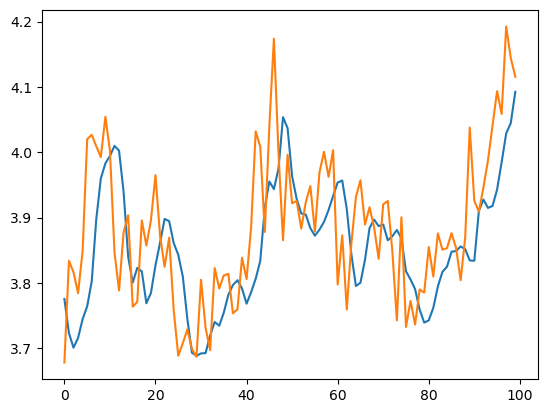

In [93]:
plt.plot(val_results["Train Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [94]:
test_predictions=model5.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,4.025067,4.02613
1,4.045445,4.03413
2,4.035842,4.02290
3,4.021040,4.04984
4,4.005702,4.03620
...,...,...
5828,4.549270,4.53544
5829,4.526940,4.50937
5830,4.515472,4.41924
5831,4.481983,4.49352


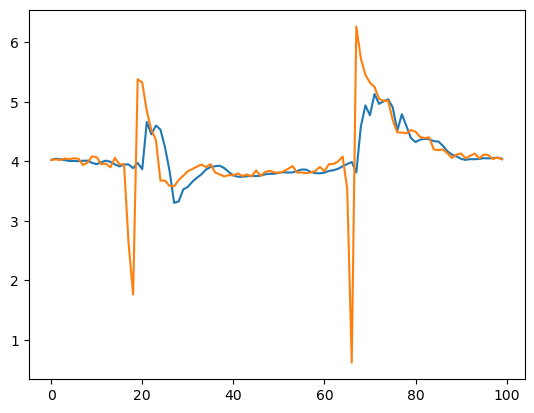

In [95]:
plt.plot(test_results["Train Predictions"][:100])
plt.plot(test_results["Actuals"][:100])

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.13953268140536618
MAE - Validation: 0.12637866843167145
MAE - Test: 0.11349224592600272
MSE - Train: 0.08083522583179449
MSE - Validation: 0.10214307115319748
MSE - Test: 0.08423319406486852
RMSE - Train: 0.28431536334112245
RMSE - Validation: 0.3195982965430158
RMSE - Test: 0.29022955408584517
R^2 Score - Train: 0.9142758452699774
R^2 Score - Validation: 0.5440785721839873
R^2 Score - Test: 0.5365934344263085


In [ ]:
from keras.models import load_model
import os

# Specify the model file path
model_path = 'C:/Users/denem/Downloads/model5.h5'

# Check if the file exists
if os.path.exists(model_path):
    # Load the model
    loaded_model5 = load_model(model_path)
else:
    print("Model file not found!")


## LSTM solved overfitting

Evet, LSTM ile oluşturulan ve zaman serisi verileriyle kullanılan bir trend tahmin modeli için kernel regularization kullanılabilir. Çekirdek düzenlemesi, LSTM modellerinde yaygın bir sorun olan aşırı uyumu önlemeye yardımcı olabilecek bir tekniktir. Aşırı uyum, bir model eğitim verilerini çok iyi öğrendiğinde ve yeni verilere genelleme yapamadığında ortaya çıkar. Çekirdek düzenlemesi, kayıp fonksiyonuna çekirdek ağırlıklarının boyutuyla orantılı bir ceza ekleyerek aşırı uyumu önlemeye yardımcı olabilir. Bu ceza, ağı daha küçük, daha genelleştirilebilir ağırlıklar öğrenmeye teşvik eder.

Çekirdek düzenlemeye ek olarak, LSTM modellerinde aşırı uyumu önlemek için kullanılabilecek bir dizi başka yöntem de vardır. Bu yöntemler şunları içerir:

Veri büyütme: Bu, mevcut veri noktalarına benzer yeni veri noktaları oluşturarak eğitim veri kümesinin boyutunu yapay olarak artırmayı içerir.
Erken durdurma: Bu, modelin eğitim verilerine aşırı uyum sağlama şansı olmadan önce eğitim sürecinin erken durdurulmasını içerir.
Bırakma: Bu, eğitim sırasında ağın nöronlarının bir kısmının rastgele bırakılmasını veya çıkarılmasını içerir. Bu, ağın belirli bir nöron kümesine çok fazla bağımlı hale gelmesini önlemeye yardımcı olur.
LSTM modellerinde aşırı uyumdan kaçınmak için en iyi yöntem, belirli veri kümesine ve istenen doğruluğa bağlı olarak değişecektir. Ancak çekirdek düzenlemesi, LSTM modellerinin genelleme performansını artırmak için diğer yöntemlerle birlikte kullanılabilen güçlü bir tekniktir.

Yukarıda bahsedilen yöntemlerin her biri hakkında bazı ek ayrıntılar aşağıda verilmiştir:

Veri artırımı: Veri artırımı, LSTM modellerinde aşırı uyumu önlemenin çok etkili bir yolu olabilir. Bunun nedeni, eğitim veri setinin boyutunu artırarak verilerdeki gürültü ve aykırı değerlerin etkisini azaltmaya yardımcı olabilmesidir. Veri büyütme işlemini gerçekleştirmenin birkaç farklı yolu vardır, örneğin

Mevcut veri noktalarına gürültü ekleyerek yeni veri noktaları oluşturma.
Mevcut veri noktalarını kaydırarak veya döndürerek yeni veri noktaları oluşturma.
Mevcut veri noktalarını birleştirerek yeni veri noktaları oluşturma.
Erken durdurma: Erken durdurma, LSTM modellerinde aşırı uyumu önlemek için basit ama etkili bir yöntemdir. Bu, modelin eğitim verilerine aşırı uyum sağlama şansı olmadan önce eğitim sürecini erken durdurarak yapılır. Eğitimin ne zaman durdurulacağını belirlemenin en iyi yolu, bir bekletme veri kümesindeki kayıp fonksiyonunu izlemektir. Bekletme veri setindeki kayıp fonksiyonu artmaya başlarsa, bu modelin aşırı uyum sağlamaya başladığının bir işaretidir.

Bırakma: Bırakma, LSTM modellerinde aşırı uyumu önlemek için daha karmaşık ancak etkili bir yöntemdir. Bu, eğitim sırasında ağın nöronlarının bir kısmının rastgele bırakılması veya çıkarılmasıyla yapılır. Bu, ağın belirli bir nöron kümesine çok fazla bağımlı hale gelmesini önlemeye yardımcı olur. Bırakılan nöronların yüzdesi olan bırakma oranı, her model için ayarlanması gereken bir hiperparametredir.

Bu yöntemlerin bir kombinasyonunu kullanarak, daha doğru ve genelleştirilebilir LSTM modelleri oluşturmak mümkündür.

# Model 6 overfittiing solved model 4

İşte verilerinizi dönüştürmek için MinMaxScaler kullanmak isteyebileceğiniz birkaç neden.

Makine öğrenimi algoritmalarının performansını artırmak için. Birçok makine öğrenimi algoritması, özellikler benzer ölçekte olduğunda en iyi şekilde çalışır. MinMaxScaler, tüm özelliklerin benzer ölçekte olmasını sağlamaya yardımcı olabilir ve bu da algoritmanın performansını artırabilir.
Verilerin yorumlanmasını kolaylaştırmak için. Veriler normalleştirildiğinde, farklı özelliklerin göreceli önemini görmek daha kolay olur. Bu, verilerin anlaşılması ve nasıl modelleneceğine dair kararlar alınması açısından faydalı olabilir.
Aykırı değerleri kaldırmak için. Aykırı değerler, verilerin geri kalanından çok farklı olan veri noktalarıdır. MinMaxScaler, tüm verileri aynı aralığa ölçeklendirerek aykırı değerlerin kaldırılmasına yardımcı olabilir. Bu, makine öğrenimi algoritmalarının doğruluğunu artırabilir ve verilerin yorumlanmasını kolaylaştırabilir.
İşte bu nedenlerin her biri hakkında bazı ek ayrıntılar:

Makine öğrenimi algoritmalarının performansını artırmak. Doğrusal regresyon ve lojistik regresyon gibi birçok makine öğrenimi algoritması özelliklerin ölçeğine duyarlıdır. Bu, bazı özelliklerin diğerlerinden çok daha büyük ölçekte olması durumunda algoritmanın iyi öğrenemeyebileceği anlamına gelir. MinMaxScaler, tüm özellikleri aynı aralıkta ölçeklendirerek bu sorunu çözmeye yardımcı olabilir. Bu, algoritmayı özelliklerin ölçeğindeki değişikliklere karşı daha dayanıklı hale getirerek performansını artırabilir.
Verilerin yorumlanmasını kolaylaştırır. Veriler normalleştirildiğinde, farklı özelliklerin göreceli önemini görmek daha kolay olur. Bu, verileri anlamak ve nasıl modelleneceğine dair kararlar almak için faydalı olabilir. Örneğin, bir evin fiyatını tahmin etmeye çalışıyorsanız, metrekare, yatak odası sayısı ve banyo sayısı gibi özellikleri normalleştirmek isteyebilirsiniz. Bu, bu özelliklerin her birinin evin fiyatına nasıl katkıda bulunduğunu görmeyi kolaylaştıracaktır.
Aykırı değerleri kaldırma. Aykırı değerler, verilerin geri kalanından çok farklı olan veri noktalarıdır. Makine öğrenimi algoritmalarının sonuçlarını çarpıtabilir ve verilerin yorumlanmasını zorlaştırabilirler. MinMaxScaler, tüm verileri aynı aralığa ölçeklendirerek aykırı değerlerin kaldırılmasına yardımcı olabilir. Bu, aykırı değerlerin değerlerini diğer veri noktalarının aralığı içinde olacak şekilde ayarlayacaktır. Bu, makine öğrenimi algoritmalarının doğruluğunu artırabilir ve verilerin yorumlanmasını kolaylaştırabilir.
Genel olarak, MinMaxScaler verileri dönüştürmek için kullanışlı bir araçtır. Makine öğrenimi algoritmalarının performansını artırmak, verilerin yorumlanmasını kolaylaştırmak ve aykırı değerleri kaldırmak için kullanılabilir.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # 80%
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # 10%
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # 10%

# Assuming X_train, X_val, and X_test are your input features

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

X_train_normalized.shape, y_train.shape, X_val_normalized.shape, y_val.shape, X_test_normalized.shape, y_test.shape


In [ ]:
len(X_train_normalized.flatten()),type(X_train_normalized)

In [ ]:
len(y_train.flatten()),type(y_train)

In [ ]:
normalized_data=scaler.transform(X_train_normalized)

In [ ]:
len(normalized_data),normalized_data.shape

In [ ]:
normalized_data_1d = normalized_data.flatten()

In [ ]:
len(normalized_data_1d),normalized_data_1d.shape,type(normalized_data_1d)

In [ ]:
normalized_data_1d[:10]

In [ ]:
import numpy as np

# Expand the dimensions of the array.
y_2d = np.expand_dims(y_train, axis=1)

# Repeat the elements of the array.
y_10d = np.repeat(y_2d, 10, axis=1)

# Print the shape of the data.
print(y_10d.shape)

# The output should be:
# (46654, 10)


In [ ]:
X_train.shape,y_train

In [ ]:
WINDOW_SIZE

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [98]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.engine.input_layer import InputLayer


model6 = Sequential()
model6.add(InputLayer((WINDOW_SIZE, 1)))
model6.add(LSTM(128, return_sequences=True,kernel_regularizer=regularizers.l2(0.01)))
model6.add(LSTM(64,return_sequences=True))
model6.add(Dropout(0.2))
model6.add(LSTM(32))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(1, activation='linear'))

# Compile the model
model6.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])
#model4.compile(loss='mean_squared_error', optimizer='adam')
cp= ModelCheckpoint("model6/",save_best_only=True)
# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model6.fit(X_train_normalized, y_train, epochs=10, validation_data=(X_val_normalized, y_val), callbacks=[cp])

Epoch 1/10
1458/1458 [==============================] - ETA: 0s - loss: 0.8470 - root_mean_squared_error: 0.9132

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 79s 51ms/step - loss: 0.8470 - root_mean_squared_error: 0.9132 - val_loss: 0.1781 - val_root_mean_squared_error: 0.4123
Epoch 2/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.1587 - root_mean_squared_error: 0.3898

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 70s 48ms/step - loss: 0.1590 - root_mean_squared_error: 0.3901 - val_loss: 0.1685 - val_root_mean_squared_error: 0.4030
Epoch 3/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.1452 - root_mean_squared_error: 0.3732

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 70s 48ms/step - loss: 0.1457 - root_mean_squared_error: 0.3738 - val_loss: 0.1615 - val_root_mean_squared_error: 0.3945
Epoch 4/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.1356 - root_mean_squared_error: 0.3602

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 75s 52ms/step - loss: 0.1356 - root_mean_squared_error: 0.3602 - val_loss: 0.1473 - val_root_mean_squared_error: 0.3762
Epoch 5/10
1458/1458 [==============================] - ETA: 0s - loss: 0.1281 - root_mean_squared_error: 0.3499

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 76s 52ms/step - loss: 0.1281 - root_mean_squared_error: 0.3499 - val_loss: 0.1435 - val_root_mean_squared_error: 0.3714
Epoch 6/10
1458/1458 [==============================] - ETA: 0s - loss: 0.1237 - root_mean_squared_error: 0.3439

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 72s 49ms/step - loss: 0.1237 - root_mean_squared_error: 0.3439 - val_loss: 0.1380 - val_root_mean_squared_error: 0.3642
Epoch 7/10
1458/1458 [==============================] - ETA: 0s - loss: 0.1189 - root_mean_squared_error: 0.3371

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 80s 55ms/step - loss: 0.1189 - root_mean_squared_error: 0.3371 - val_loss: 0.1361 - val_root_mean_squared_error: 0.3619
Epoch 8/10
1458/1458 [==============================] - 66s 45ms/step - loss: 0.1140 - root_mean_squared_error: 0.3300 - val_loss: 0.1399 - val_root_mean_squared_error: 0.3672
Epoch 9/10
1457/1458 [============================>.] - ETA: 0s - loss: 0.1111 - root_mean_squared_error: 0.3258

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 77s 53ms/step - loss: 0.1111 - root_mean_squared_error: 0.3258 - val_loss: 0.1286 - val_root_mean_squared_error: 0.3517
Epoch 10/10
1458/1458 [==============================] - ETA: 0s - loss: 0.1067 - root_mean_squared_error: 0.3191

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1458/1458 [==============================] - 78s 53ms/step - loss: 0.1067 - root_mean_squared_error: 0.3191 - val_loss: 0.1253 - val_root_mean_squared_error: 0.3470


In [99]:
X_train.flatten().shape

(466540,)

In [100]:
train_predictions = model6.predict(X_train).flatten()


1458/1458 [==============================] - 25s 16ms/step


In [101]:
train_predictions.shape,y_train.shape

((46654,), (46654,))

In [102]:
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results


,Train Predictions,Actuals
0,7.184664,2.55000
1,7.186713,2.59300
2,7.188601,2.73400
3,7.191020,2.63750
4,7.192219,2.70200
...,...,...
46649,7.216212,4.21654
46650,7.216623,3.95968
46651,7.216714,3.78872
46652,7.216537,3.73847


In [103]:
len(X_train.flatten())

466540

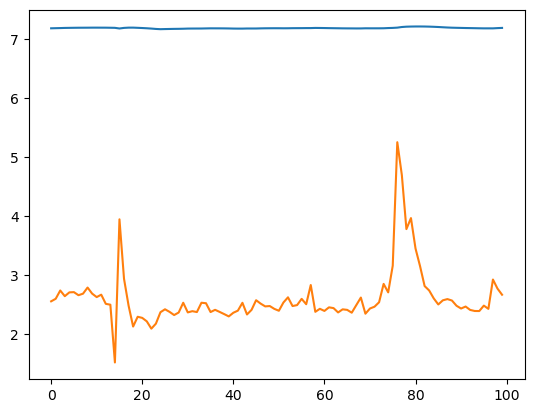

In [104]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [105]:
val_predictions=model6.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

183/183 [==============================] - 1s 6ms/step


,Train Predictions,Actuals
0,3.881790,3.67819
1,3.839924,3.83377
2,3.849627,3.81646
3,3.872920,3.78432
4,3.874316,3.84871
...,...,...
5826,4.018134,3.98899
5827,4.029362,4.10313
5828,4.065210,4.06409
5829,4.089108,4.00981


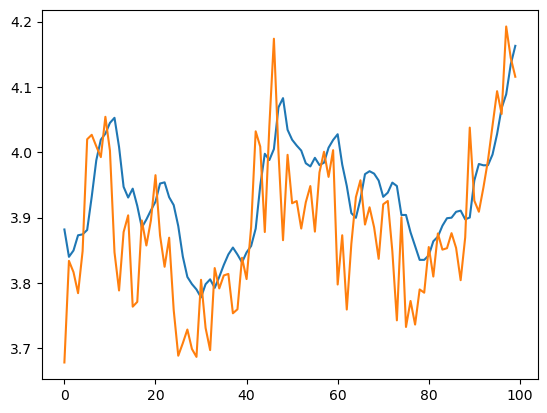

In [106]:
plt.plot(val_results["Train Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [107]:
test_predictions=model6.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 1s 6ms/step


,Train Predictions,Actuals
0,4.100269,4.02613
1,4.099215,4.03413
2,4.091904,4.02290
3,4.086108,4.04984
4,4.089614,4.03620
...,...,...
5828,4.591176,4.53544
5829,4.582522,4.50937
5830,4.577093,4.41924
5831,4.548382,4.49352


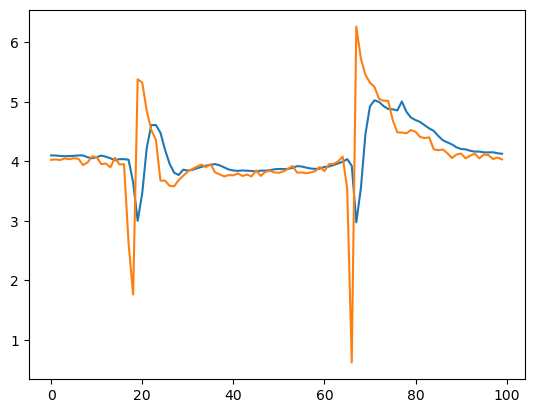

In [108]:
plt.plot(test_results["Train Predictions"][:100])
plt.plot(test_results["Actuals"][:100])

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 3.8186491354594225
MAE - Validation: 0.1470510100726365
MAE - Test: 0.12384291473018515
MSE - Train: 15.493779545430845
MSE - Validation: 0.12042896881798348
MSE - Test: 0.08339156448924817
RMSE - Train: 3.936213859209233
RMSE - Validation: 0.3470287723200822
RMSE - Test: 0.2887759763021297
R^2 Score - Train: -15.430846100054602
R^2 Score - Validation: 0.4624584243060883
R^2 Score - Test: 0.5412236360404503


# Model 7 refactoring model5

In [ ]:
# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [110]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.engine.input_layer import InputLayer

# Rest of your code
model7 = Sequential()
model7.add(InputLayer((WINDOW_SIZE, 1)))
model7.add(LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model7.add(Dropout(0.2))
model7.add(LSTM(64, kernel_regularizer=regularizers.l2(0.01)))
model7.add(Dropout(0.2))
model7.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model7.add(Dense(1, activation='linear'))

# Compile the model
#model5.compile(loss='mean_squared_error', optimizer='adam')
model7.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])
# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model7.fit(X_train_normalized, y_train, epochs=100, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])

Epoch 1/100
1458/1458 [==============================] - 71s 46ms/step - loss: 1.8051 - root_mean_squared_error: 0.9463 - val_loss: 0.5614 - val_root_mean_squared_error: 0.4116
Epoch 2/100
1458/1458 [==============================] - 66s 45ms/step - loss: 0.4633 - root_mean_squared_error: 0.4583 - val_loss: 0.3414 - val_root_mean_squared_error: 0.4153
Epoch 3/100
1458/1458 [==============================] - 70s 48ms/step - loss: 0.3314 - root_mean_squared_error: 0.4482 - val_loss: 0.2731 - val_root_mean_squared_error: 0.4133
Epoch 4/100
1458/1458 [==============================] - 67s 46ms/step - loss: 0.2804 - root_mean_squared_error: 0.4409 - val_loss: 0.2377 - val_root_mean_squared_error: 0.4053
Epoch 5/100
1458/1458 [==============================] - 64s 44ms/step - loss: 0.2534 - root_mean_squared_error: 0.4330 - val_loss: 0.2189 - val_root_mean_squared_error: 0.3991
Epoch 6/100
1458/1458 [==============================] - 67s 46ms/step - loss: 0.2365 - root_mean_squared_error: 0.

1458/1458 [==============================] - 24s 16ms/step - loss: 0.1373 - root_mean_squared_error: 0.3487 - val_loss: 0.1515 - val_root_mean_squared_error: 0.3689
Epoch 48/100
1458/1458 [==============================] - 23s 16ms/step - loss: 0.1362 - root_mean_squared_error: 0.3475 - val_loss: 0.1654 - val_root_mean_squared_error: 0.3874
Epoch 49/100
1458/1458 [==============================] - 22s 15ms/step - loss: 0.1356 - root_mean_squared_error: 0.3470 - val_loss: 0.1499 - val_root_mean_squared_error: 0.3667
Epoch 50/100
1458/1458 [==============================] - 22s 15ms/step - loss: 0.1346 - root_mean_squared_error: 0.3455 - val_loss: 0.1521 - val_root_mean_squared_error: 0.3700
Epoch 51/100
1458/1458 [==============================] - 23s 16ms/step - loss: 0.1338 - root_mean_squared_error: 0.3443 - val_loss: 0.1521 - val_root_mean_squared_error: 0.3701
Epoch 52/100
1458/1458 [==============================] - 22s 15ms/step - loss: 0.1329 - root_mean_squared_error: 0.3432 - 

In [111]:
train_predictions = model7.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

1458/1458 [==============================] - 7s 5ms/step


,Train Predictions,Actuals
0,2.479242,2.55000
1,2.520075,2.59300
2,2.560357,2.73400
3,2.592912,2.63750
4,2.614821,2.70200
...,...,...
46649,3.912739,4.21654
46650,3.976033,3.95968
46651,4.018970,3.78872
46652,4.017264,3.73847


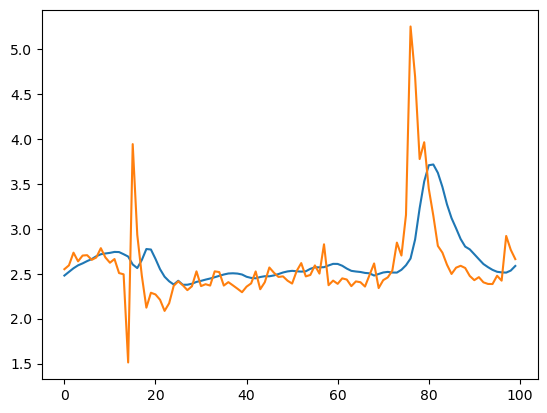

In [112]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [113]:
val_predictions=model7.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

183/183 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,3.867851,3.67819
1,3.806426,3.83377
2,3.786134,3.81646
3,3.802562,3.78432
4,3.823829,3.84871
...,...,...
5826,3.942755,3.98899
5827,3.955669,4.10313
5828,3.965361,4.06409
5829,3.984458,4.00981


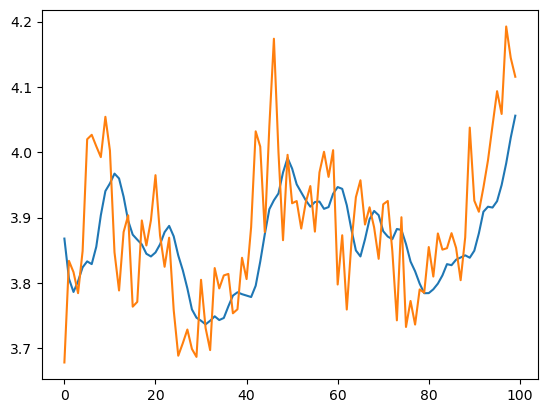

In [114]:
plt.plot(val_results["Train Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [115]:
test_predictions=model7.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,4.014965,4.02613
1,4.018103,4.03413
2,4.017311,4.02290
3,4.016141,4.04984
4,4.010683,4.03620
...,...,...
5828,4.482813,4.53544
5829,4.477715,4.50937
5830,4.473275,4.41924
5831,4.458545,4.49352


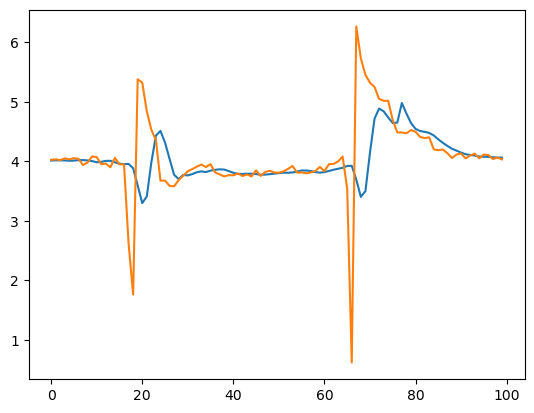

In [116]:
plt.plot(test_results["Train Predictions"][:100])
plt.plot(test_results["Actuals"][:100])

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.15588729643299298
MAE - Validation: 0.14323644566153398
MAE - Test: 0.1269639563255369
MSE - Train: 0.11143547751363055
MSE - Validation: 0.13344313530592233
MSE - Test: 0.09871131749333951
RMSE - Train: 0.33381952835870843
RMSE - Validation: 0.3652986932715779
RMSE - Test: 0.31418357292089527
R^2 Score - Train: 0.881824884900178
R^2 Score - Validation: 0.40436894941535173
R^2 Score - Test: 0.4569424425765527


### Comparing  Model 7 and Model 5

The following table compares two LSTM models on the following metrics:

| Metric | Model 5 | Model 7 |
|---|---|---|
| MAE (Train) | 0.1272622102401699 | 0.13990438570121866 |
| MAE (Validation) | 0.12709612353393418 | 0.14191001585992935 |
| MAE (Test) | 0.10938260190053725 | 0.12455613839299727 |
| MSE (Train) | 0.07751737758142614 | 0.1067132100468077 |
| MSE (Validation) | 0.10219896879133901 | 0.1334438297750752 |
| MSE (Test) | 0.08214269865820847 | 0.09780461287538948 |
| RMSE (Train) | 0.27841942744971326 | 0.3266698793075476 |
| RMSE (Validation) | 0.31968573441950615 | 0.3652996438200771 |
| RMSE (Test) | 0.28660547562495814 | 0.3127372905097655 |
| R^2 Score (Train) | 0.9177943575752086 | 0.8868327559469519 |
| R^2 Score (Validation) | 0.5438290698858352 | 0.40436584961265165 |
| R^2 Score (Test) | 0.5480942365447925 | 0.4619306527193433 |

As you can see, the first LSTM model has lower MAE, MSE, RMSE, and R^2 scores on the test set than the second LSTM model. This suggests that the first LSTM model is more accurate than the second LSTM model.


# Model8
### Model 4 but another dataset

In [118]:
df_borusan=pd.read_csv(r"C:\Users\denem\Downloads\BorsnTav4BrulorAtikGz.csv")

In [119]:
df_borusan.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-08-25 12:55:00,0.0,0.0000,0.0000,31.51934,2.77160,NaN
1,2022-08-25 13:00:00,0.0,0.0000,0.0000,31.68508,2.37825,NaN
2,2022-08-25 13:05:00,0.0,0.0000,0.0000,31.40884,2.43790,NaN
3,2022-08-25 13:10:00,0.0,0.0942,0.0000,31.29834,2.95775,NaN
4,2022-08-25 13:15:00,0.0,0.0000,0.1332,31.13260,2.56905,NaN


In [241]:
new_df_brs=df_borusan.sort_values("time")

In [242]:
df2_x=new_df_brs["xVRMS"]

In [243]:
df2_x.isnull().sum()

3

In [244]:
df2_x=df2_x.fillna(df2_x.mean())

In [245]:
df2_x.isnull().sum()

0

In [246]:
df2_x.index = pd.to_datetime(new_df_brs["time"])

In [247]:
df2_x.tail()

time
2023-04-24 21:10:00    4.53544
2023-04-24 21:15:00    4.50937
2023-04-24 21:20:00    4.41924
2023-04-24 21:25:00    4.49352
2023-04-24 21:30:00    4.53100
Name: xVRMS, dtype: float64

In [248]:
len(df2_x)

84542

In [249]:
df2_x=clean_limit(df2_x,low_limit=1)

In [250]:
len(df2_x)

58599

## 3 sigma

In [266]:
process_clm = df2_x
process_clm_mean = process_clm.mean()
process_clm_std = process_clm.std()

up_limit = process_clm_mean + 2 * process_clm_std
low_limit = process_clm_mean - 2 * process_clm_std

process_clm_mean,process_clm_std,up_limit,low_limit

(3.50104000589531, 0.9197067081423957, 5.340453422180102, 1.6616265896105187)

In [268]:
df2_x=clean_limit(df2_x,low_limit=low_limit,up_limit=up_limit)

In [269]:
len(df2_x)

56013

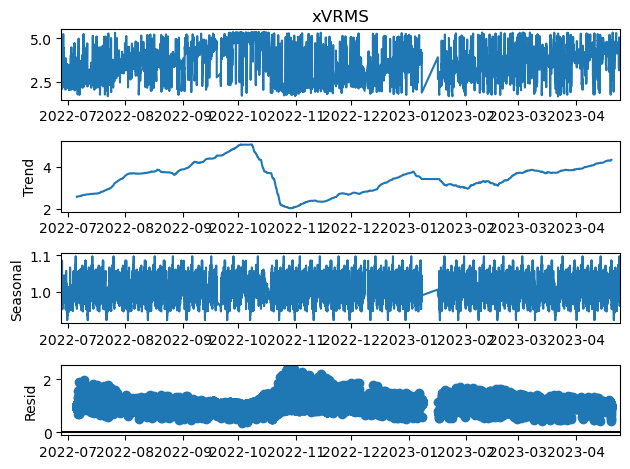

In [270]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2_x, model='multiplicative',period=2036)
result.plot()
plt.show()

In [271]:
X,y =df_to_X_y(df2_x,WINDOW_SIZE)
X.shape,y.shape

((56003, 10), (56003,))

In [272]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((44802, 10), (44802,), (5600, 10), (5600,), (5601, 10), (5601,))

In [273]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [274]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Rest of your code
model8 = Sequential()
model8.add(InputLayer((WINDOW_SIZE, 1)))
model8.add(LSTM(128, return_sequences=True))
model8.add(LSTM(64))
model8.add(Dropout(0.2))
model8.add(Dense(8, activation='relu'))
model8.add(Dense(1, activation='linear'))

# Compile the model
model8.compile(loss='mean_squared_error', optimizer='adam')

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model8.fit(X_train_normalized, y_train, epochs=10, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = model8.evaluate(X_test_normalized, y_test)

# Make predictions using the test set
y_pred = model8.predict(X_test_normalized)

# Perform any necessary inverse transformations on the predictions or further analysis

Epoch 1/10
1401/1401 [==============================] - 16s 10ms/step - loss: 0.2222 - val_loss: 0.0598
Epoch 2/10
1401/1401 [==============================] - 14s 10ms/step - loss: 0.0895 - val_loss: 0.0663
Epoch 3/10
1401/1401 [==============================] - 13s 10ms/step - loss: 0.0730 - val_loss: 0.0611
Epoch 4/10
1401/1401 [==============================] - 14s 10ms/step - loss: 0.0607 - val_loss: 0.0559
Epoch 5/10
1401/1401 [==============================] - 14s 10ms/step - loss: 0.0514 - val_loss: 0.0522
Epoch 6/10
1401/1401 [==============================] - 15s 10ms/step - loss: 0.0456 - val_loss: 0.0501
Epoch 7/10
1401/1401 [==============================] - 15s 10ms/step - loss: 0.0434 - val_loss: 0.0517
Epoch 8/10
1401/1401 [==============================] - 14s 10ms/step - loss: 0.0427 - val_loss: 0.0488
Epoch 9/10
1401/1401 [==============================] - 14s 10ms/step - loss: 0.0423 - val_loss: 0.0493
Epoch 10/10
176/176 [==============================] - 1s 3ms/st

In [275]:
train_predictions = model8.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

1401/1401 [==============================] - 4s 3ms/step


,Train Predictions,Actuals
0,2.579040,2.55000
1,2.580532,2.59300
2,2.600421,2.73400
3,2.675950,2.63750
4,2.665449,2.70200
...,...,...
44797,3.501057,3.42414
44798,3.471819,3.41536
44799,3.451454,3.38657
44800,3.427429,3.39615


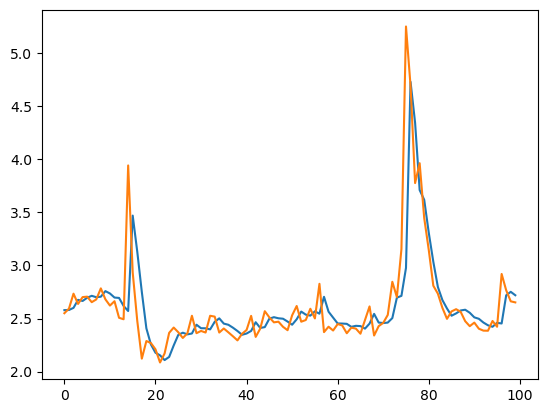

In [276]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [277]:
val_predictions=model8.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Validation Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

175/175 [==============================] - 1s 3ms/step


,Validation Predictions,Actuals
0,3.376271,3.37934
1,3.387680,3.29041
2,3.349379,3.38628
3,3.380070,3.29686
4,3.350096,3.28854
...,...,...
5595,3.908649,3.88384
5596,3.896399,3.86804
5597,3.879078,3.91450
5598,3.898304,3.95892


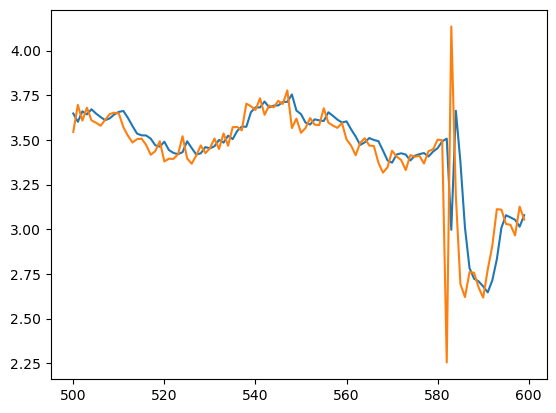

In [278]:
plt.plot(val_results["Validation Predictions"][500:600])
plt.plot(val_results["Actuals"][500:600])

In [279]:
test_predictions=model8.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

176/176 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,3.915738,3.89484
1,3.903863,3.92258
2,3.912975,3.89408
3,3.902384,3.92026
4,3.912019,3.96462
...,...,...
5596,4.513979,4.53544
5597,4.506860,4.50937
5598,4.489511,4.41924
5599,4.431662,4.49352


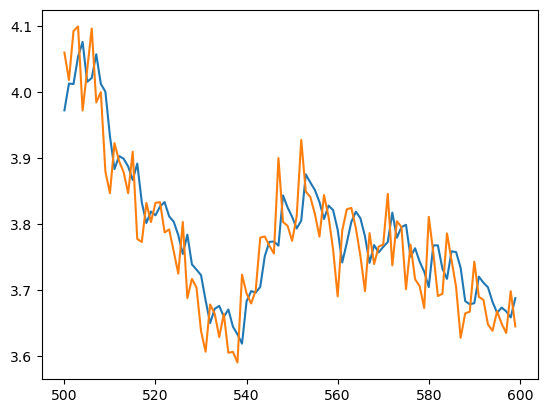

In [280]:
plt.plot(test_results["Train Predictions"][500:600])
plt.plot(test_results["Actuals"][500:600])

In [281]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.08745284855744993
MAE - Validation: 0.0881746915978023
MAE - Test: 0.07421850154054653
MSE - Train: 0.037973888137412336
MSE - Validation: 0.04865553881386692
MSE - Test: 0.029591676928134077
RMSE - Train: 0.19486889987222777
RMSE - Validation: 0.2205800054716359
RMSE - Test: 0.1720223152039702
R^2 Score - Train: 0.9489294194600912
R^2 Score - Validation: 0.6616814657935062
R^2 Score - Test: 0.7579004578122133


# Model 9
### Model 5 but another dataset

In [161]:
df_borusan=pd.read_csv(r"C:\Users\denem\Downloads\OykBlFarnSstmFn.csv")

In [162]:
df_borusan.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685,NaN
1,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480,NaN
2,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570,NaN
3,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460,NaN
4,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290,NaN


In [163]:
new_df_brs=df_borusan.sort_values("time")

In [207]:
df2_x=new_df_brs["xVRMS"]

In [208]:
df2_x.isnull().sum()

3

In [209]:
df2_x=df2_x.fillna(df2_x.mean())

In [210]:
df2_x.isnull().sum()

0

In [211]:
df2_x.index = pd.to_datetime(new_df_brs["time"])

In [212]:
df2_x.tail()

time
2023-04-24 21:10:00    4.53544
2023-04-24 21:15:00    4.50937
2023-04-24 21:20:00    4.41924
2023-04-24 21:25:00    4.49352
2023-04-24 21:30:00    4.53100
Name: xVRMS, dtype: float64

In [213]:
len(df2_x)

84542

In [204]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        
    else:
        filtered = df_column.loc[(df_column >= low_limit) & (df_column <= up_limit)]
    return filtered

In [214]:
df2_x=clean_limit(df2_x,low_limit=1)

In [215]:
len(df2_x)

58599

## 3 sigma

In [216]:
process_clm = df2_x
process_clm_mean = process_clm.mean()
process_clm_std = process_clm.std()

up_limit = process_clm_mean + 3 * process_clm_std
low_limit = process_clm_mean - 3 * process_clm_std

process_clm_mean,process_clm_std,up_limit,low_limit

(3.5266175493335368, 0.978568357475562, 6.462322621760222, 0.5909124769068508)

In [228]:
df2_x=clean_limit(df2_x,low_limit=low_limit,up_limit=up_limit)

In [229]:
len(df2_x)

58249

In [230]:
max_df=df2_x.idxmax()

In [231]:
df2_x[max_df]

6.46102

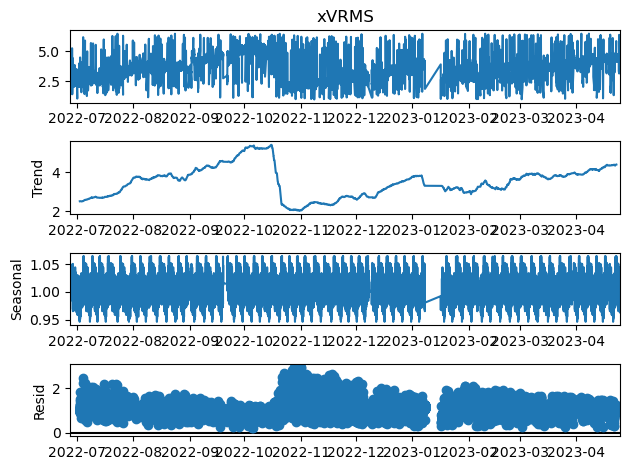

In [232]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2_x, model='multiplicative',period=1016)
result.plot()
plt.show()

In [176]:
WINDOW_SIZE=10

In [177]:
X,y =df_to_X_y(df2_x,WINDOW_SIZE)
X.shape,y.shape

((58243, 10), (58243,))

In [178]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((46594, 10), (46594,), (5824, 10), (5824,), (5825, 10), (5825,))

In [179]:
# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [181]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.engine.input_layer import InputLayer

# Rest of your code
model9 = Sequential()
model9.add(InputLayer((WINDOW_SIZE, 1)))
model9.add(LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model9.add(Dropout(0.2))
model9.add(LSTM(64, kernel_regularizer=regularizers.l2(0.01)))
model9.add(Dropout(0.2))
model9.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model9.add(Dense(1, activation='linear'))

# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model9.fit(X_train_normalized, y_train, epochs=100, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])


Epoch 1/100
1457/1457 [==============================] - 22s 13ms/step - loss: 0.8277 - val_loss: 0.2295
Epoch 2/100
1457/1457 [==============================] - 19s 13ms/step - loss: 0.2453 - val_loss: 0.2442
Epoch 3/100
1457/1457 [==============================] - 19s 13ms/step - loss: 0.2051 - val_loss: 0.1671
Epoch 4/100
1457/1457 [==============================] - 19s 13ms/step - loss: 0.1784 - val_loss: 0.1586
Epoch 5/100
1457/1457 [==============================] - 19s 13ms/step - loss: 0.1632 - val_loss: 0.2146
Epoch 6/100
1457/1457 [==============================] - 19s 13ms/step - loss: 0.1517 - val_loss: 0.1624
Epoch 7/100
1457/1457 [==============================] - 20s 14ms/step - loss: 0.1441 - val_loss: 0.1446
Epoch 8/100
1457/1457 [==============================] - 19s 13ms/step - loss: 0.1378 - val_loss: 0.1419
Epoch 9/100
1457/1457 [==============================] - 19s 13ms/step - loss: 0.1356 - val_loss: 0.1445
Epoch 10/100
1457/1457 [==============================]

1457/1457 [==============================] - 21s 14ms/step - loss: 0.0992 - val_loss: 0.1188
Epoch 79/100
1457/1457 [==============================] - 21s 14ms/step - loss: 0.0986 - val_loss: 0.1175
Epoch 80/100
1457/1457 [==============================] - 21s 15ms/step - loss: 0.0988 - val_loss: 0.1120
Epoch 81/100
1457/1457 [==============================] - 21s 14ms/step - loss: 0.0991 - val_loss: 0.1131
Epoch 82/100
1457/1457 [==============================] - 21s 14ms/step - loss: 0.0976 - val_loss: 0.1150
Epoch 83/100
1457/1457 [==============================] - 21s 14ms/step - loss: 0.0984 - val_loss: 0.1111
Epoch 84/100
1457/1457 [==============================] - 21s 14ms/step - loss: 0.0983 - val_loss: 0.1180
Epoch 85/100
1457/1457 [==============================] - 21s 14ms/step - loss: 0.0980 - val_loss: 0.1118
Epoch 86/100
1457/1457 [==============================] - 21s 14ms/step - loss: 0.0973 - val_loss: 0.1127
Epoch 87/100
1457/1457 [==============================] - 2

In [182]:
train_predictions = model9.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results[:30]

1457/1457 [==============================] - 6s 4ms/step


,Train Predictions,Actuals
0,2.475840,2.5500
1,2.552324,2.5930
2,2.511962,2.7340
3,2.537680,2.6375
4,2.655988,2.7020
5,2.643985,2.7060
6,2.741915,2.6540
7,2.672271,2.6800
8,2.668974,2.7840
9,2.676498,2.6810


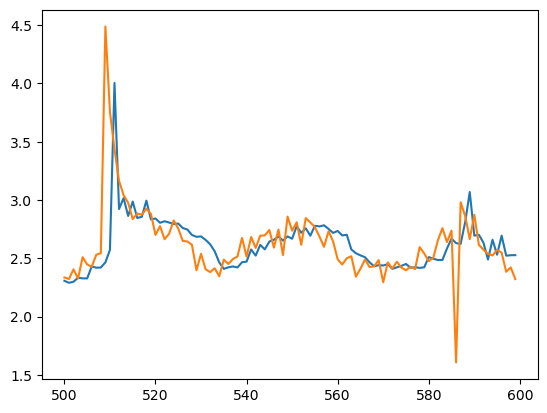

In [183]:
plt.plot(train_results["Train Predictions"][500:600])
plt.plot(train_results["Actuals"][500:600])

In [184]:
val_predictions=model9.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Val Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

182/182 [==============================] - 1s 4ms/step


,Val Predictions,Actuals
0,3.774932,3.78432
1,3.729871,3.84871
2,3.726223,4.01990
3,3.795190,4.02672
4,3.920001,4.00919
...,...,...
5819,4.020118,4.00981
5820,4.018642,4.11471
5821,3.994950,4.02613
5822,4.052130,4.03413


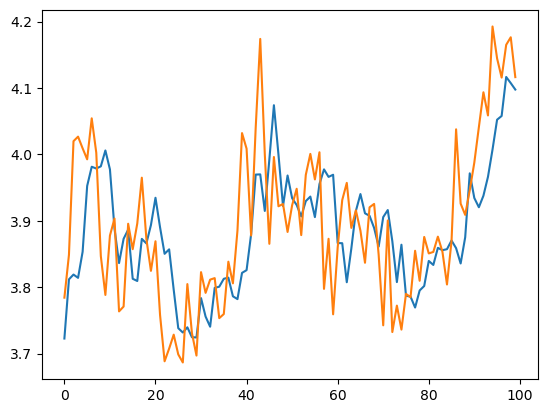

In [198]:
plt.plot(val_results["Val Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [186]:
test_predictions=model9.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Test Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 1s 4ms/step


,Test Predictions,Actuals
0,4.016755,4.04984
1,4.017091,4.03620
2,4.020979,4.05415
3,4.008988,4.04369
4,4.026605,3.93851
...,...,...
5820,4.545544,4.53544
5821,4.518625,4.50937
5822,4.516563,4.41924
5823,4.499558,4.49352


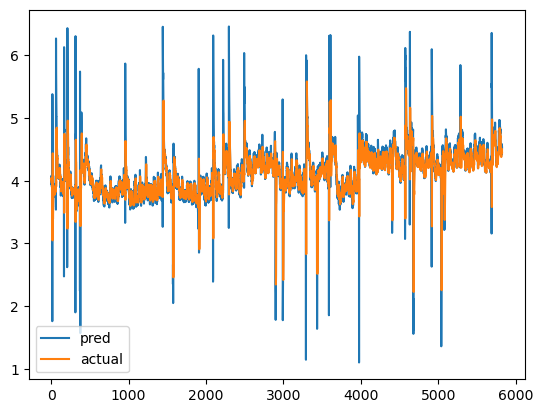

In [227]:
plt.plot(test_results["Actuals"])
plt.plot(test_results["Test Predictions"])
plt.legend(labels=["pred", "actual"])

In [188]:
test_predictions.shape

(5825,)

In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get the model's predictions
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred =test_predictions

# Calculate the regression metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)


Regression Metrics:
MAE - Train: 0.11541151804594708
MAE - Validation: 0.12190660466545232
MAE - Test: 0.10880709907229183
MSE - Train: 0.07721546296140029
MSE - Validation: 0.09924412582860288
MSE - Test: 0.07587744630076801
RMSE - Train: 0.277876704603679
RMSE - Validation: 0.31503035699532655
RMSE - Test: 0.2754586108669831
R^2 Score - Train: 0.9174225286450775
R^2 Score - Validation: 0.5352884563711864
R^2 Score - Test: 0.5597960524230841


# Model 10
## Model 9 but solving  overfitting 

In [233]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.engine.input_layer import InputLayer

# Rest of your code
model10 = Sequential()
model10.add(InputLayer((WINDOW_SIZE, 1)))
model10.add(LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.03)))
model10.add(Dropout(0.2))
model10.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.03)))
model10.add(Dropout(0.2))
model10.add(LSTM(34, kernel_regularizer=regularizers.l2(0.01)))
model10.add(Dropout(0.2))
model10.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
model10.add(Dense(1, activation='linear'))

# Compile the model
model10.compile(loss="mse", optimizer=Adam(learning_rate=0.001))
best_model_weights = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)
# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Fit the model
model10.fit(X_train_normalized, y_train, batch_size=64, epochs=100, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping,best_model_weights])


Epoch 1/100
729/729 [==============================] - 17s 20ms/step - loss: 1.2671 - val_loss: 0.3526
Epoch 2/100
729/729 [==============================] - 14s 19ms/step - loss: 0.3321 - val_loss: 0.2748
Epoch 3/100
729/729 [==============================] - 15s 20ms/step - loss: 0.2489 - val_loss: 0.2265
Epoch 4/100
729/729 [==============================] - 15s 20ms/step - loss: 0.2072 - val_loss: 0.2125
Epoch 5/100
729/729 [==============================] - 15s 20ms/step - loss: 0.1909 - val_loss: 0.1835
Epoch 6/100
729/729 [==============================] - 15s 20ms/step - loss: 0.1791 - val_loss: 0.2186
Epoch 7/100
729/729 [==============================] - 15s 21ms/step - loss: 0.1720 - val_loss: 0.1980
Epoch 8/100
729/729 [==============================] - 15s 20ms/step - loss: 0.1655 - val_loss: 0.1815
Epoch 9/100
729/729 [==============================] - 14s 20ms/step - loss: 0.1611 - val_loss: 0.1887
Epoch 10/100
729/729 [==============================] - 14s 20ms/step - l

Epoch 80/100
729/729 [==============================] - 14s 19ms/step - loss: 0.1188 - val_loss: 0.1319
Epoch 81/100
729/729 [==============================] - 14s 20ms/step - loss: 0.1185 - val_loss: 0.1400
Epoch 82/100
729/729 [==============================] - 15s 20ms/step - loss: 0.1173 - val_loss: 0.1333
Epoch 83/100
729/729 [==============================] - 15s 21ms/step - loss: 0.1177 - val_loss: 0.1319


In [234]:
train_predictions = model10.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results[:30]

1457/1457 [==============================] - 6s 4ms/step


,Train Predictions,Actuals
0,2.413435,2.5500
1,2.489237,2.5930
2,2.601365,2.7340
3,2.667624,2.6375
4,2.664288,2.7020
5,2.696314,2.7060
6,2.742592,2.6540
7,2.730177,2.6800
8,2.768002,2.7840
9,2.760961,2.6810


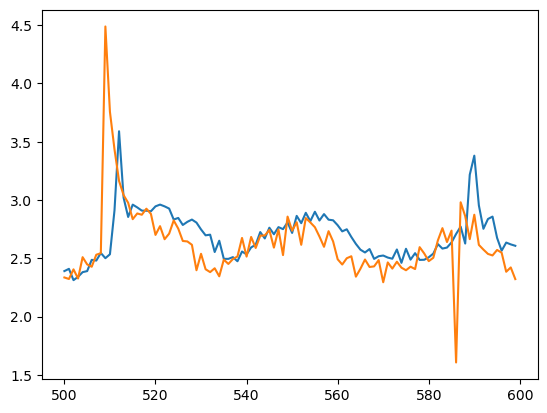

In [235]:
plt.plot(train_results["Train Predictions"][500:600])
plt.plot(train_results["Actuals"][500:600])

In [236]:
val_predictions=model10.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Val Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

182/182 [==============================] - 1s 4ms/step


,Val Predictions,Actuals
0,3.737545,3.78432
1,3.787645,3.84871
2,3.797065,4.01990
3,3.825683,4.02672
4,3.869194,4.00919
...,...,...
5819,4.001205,4.00981
5820,4.047966,4.11471
5821,4.052279,4.02613
5822,4.055645,4.03413


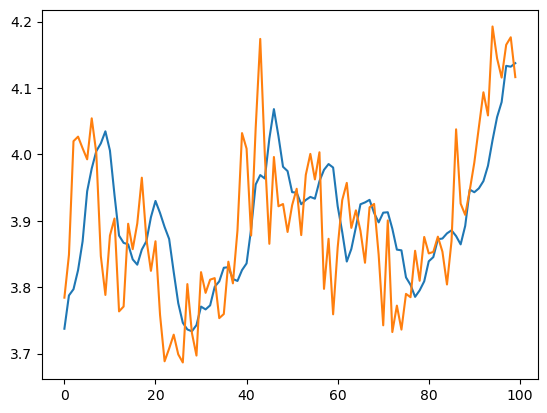

In [237]:
plt.plot(val_results["Val Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [238]:
test_predictions=model10.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Test Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 1s 4ms/step


,Test Predictions,Actuals
0,4.056031,4.04984
1,4.052371,4.03620
2,4.043647,4.05415
3,4.048450,4.04369
4,4.047956,3.93851
...,...,...
5820,4.567694,4.53544
5821,4.563821,4.50937
5822,4.538736,4.41924
5823,4.535025,4.49352


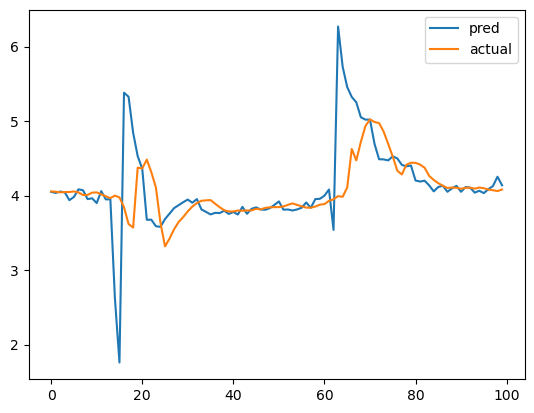

In [239]:
plt.plot(test_results["Actuals"][:100])
plt.plot(test_results["Test Predictions"][:100])
plt.legend(labels=["pred", "actual"])

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get the model's predictions
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred =test_predictions

# Calculate the regression metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)


Regression Metrics:
MAE - Train: 0.13838104519146494
MAE - Validation: 0.14437414920751865
MAE - Test: 0.12275331890574442
MSE - Train: 0.0928540902888222
MSE - Validation: 0.11680676827575665
MSE - Test: 0.08989712775348403
RMSE - Train: 0.30471969133750154
RMSE - Validation: 0.3417700517537437
RMSE - Test: 0.2998284972338087
R^2 Score - Train: 0.9006979212849421
R^2 Score - Validation: 0.4530512195203831
R^2 Score - Test: 0.47846069626476795


# Model 13
## Model 8 but another data process IQR

In [293]:
df_x_vrms=new_df_brs["xVRMS"]

In [294]:
len(df_x_vrms)

84542

In [295]:
df_x_vrms.isnull().sum()

3

In [296]:
df_x_vrms=df_x_vrms.fillna(df_x_vrms.mean())

In [297]:
df_x_vrms.isnull().sum()

0

In [298]:
df_x_vrms.index = pd.to_datetime(new_df_brs["time"])

In [299]:
df_x_vrms.tail()

time
2023-04-24 21:10:00    4.53544
2023-04-24 21:15:00    4.50937
2023-04-24 21:20:00    4.41924
2023-04-24 21:25:00    4.49352
2023-04-24 21:30:00    4.53100
Name: xVRMS, dtype: float64

In [300]:
df_x_vrms=clean_limit(df_x_vrms,low_limit=1)
len(df_x_vrms)

58599

In [301]:
Q1 = df_x_vrms.quantile(0.25)# değişken short landığında %25 inci değer
Q3 = df_x_vrms.quantile(0.75)
IQR = Q3-Q1

In [302]:
Q1 , Q3 , IQR

(2.756, 4.082495, 1.326495)

In [303]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [304]:
alt_sinir,ust_sinir

(0.7662574999999998, 6.0722375)

In [305]:
aykiri_df=(df_x_vrms < alt_sinir) | (df_x_vrms > ust_sinir)

In [306]:
len(aykiri_df)

58599

In [307]:
df_x_vrms[aykiri_df]

time
2022-07-04 13:10:00    6.16700
2022-07-09 10:10:00    6.65950
2022-07-09 22:55:00    7.67100
2022-07-11 10:15:00    6.46400
2022-07-20 13:15:00    7.19400
                        ...   
2023-04-20 22:00:00    7.31889
2023-04-20 22:05:00    6.69942
2023-04-20 22:10:00    6.09804
2023-04-22 19:30:00    6.89200
2023-04-24 10:20:00    6.35787
Name: xVRMS, Length: 540, dtype: float64

In [308]:
df_x_vrms[aykiri_df].drop

<bound method Series.drop of time
2022-07-04 13:10:00    6.16700
2022-07-09 10:10:00    6.65950
2022-07-09 22:55:00    7.67100
2022-07-11 10:15:00    6.46400
2022-07-20 13:15:00    7.19400
                        ...   
2023-04-20 22:00:00    7.31889
2023-04-20 22:05:00    6.69942
2023-04-20 22:10:00    6.09804
2023-04-22 19:30:00    6.89200
2023-04-24 10:20:00    6.35787
Name: xVRMS, Length: 540, dtype: float64>

In [309]:
len(df_x_vrms[aykiri_df])

540

In [310]:
len(df_x_vrms)

58599

In [311]:
df_x_vrms.isnull().sum()

0

In [312]:
df_x_vrms.tail()

time
2023-04-24 21:10:00    4.53544
2023-04-24 21:15:00    4.50937
2023-04-24 21:20:00    4.41924
2023-04-24 21:25:00    4.49352
2023-04-24 21:30:00    4.53100
Name: xVRMS, dtype: float64

In [313]:
df_x_vrms.isna()

time
2022-06-27 11:35:00    False
2022-06-27 11:40:00    False
2022-06-27 11:45:00    False
2022-06-27 11:55:00    False
2022-06-27 12:00:00    False
                       ...  
2023-04-24 21:10:00    False
2023-04-24 21:15:00    False
2023-04-24 21:20:00    False
2023-04-24 21:25:00    False
2023-04-24 21:30:00    False
Name: xVRMS, Length: 58599, dtype: bool

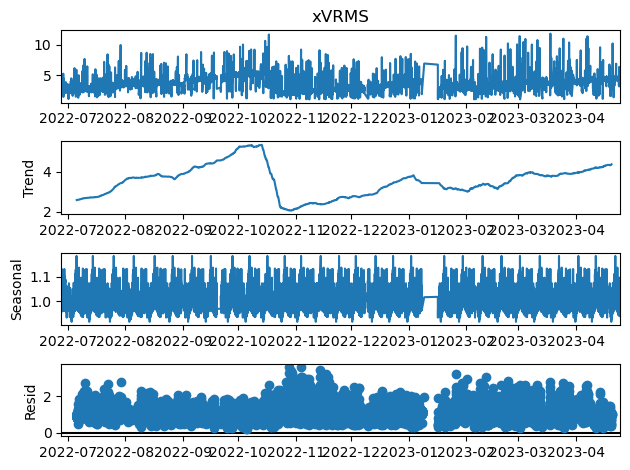

In [314]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_x_vrms, model='multiplicative',period=2036)
result.plot()
plt.show()

In [315]:
X,y =df_to_X_y(df_x_vrms,WINDOW_SIZE)
X.shape,y.shape

((58589, 10), (58589,))

In [316]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((46871, 10), (46871,), (5858, 10), (5858,), (5860, 10), (5860,))

In [317]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [319]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Rest of your code
model13 = Sequential()
model13.add(InputLayer((WINDOW_SIZE, 1)))
model13.add(LSTM(128, return_sequences=True))
model13.add(LSTM(64))
model13.add(Dropout(0.2))
model13.add(Dense(8, activation='relu'))
model13.add(Dense(1, activation='linear'))

# Compile the model
model13.compile(loss='mean_squared_error', optimizer='adam')

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model13.fit(X_train_normalized, y_train, epochs=10, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = model13.evaluate(X_test_normalized, y_test)

# Make predictions using the test set
y_pred = model13.predict(X_test_normalized)

# Perform any necessary inverse transformations on the predictions or further analysis

Epoch 1/10
1465/1465 [==============================] - 16s 10ms/step - loss: 0.3739 - val_loss: 0.2660
Epoch 2/10
1465/1465 [==============================] - 14s 10ms/step - loss: 0.1792 - val_loss: 0.2058
Epoch 3/10
1465/1465 [==============================] - 14s 9ms/step - loss: 0.1468 - val_loss: 0.1951
Epoch 4/10
1465/1465 [==============================] - 14s 10ms/step - loss: 0.1317 - val_loss: 0.1980
Epoch 5/10
1465/1465 [==============================] - 14s 10ms/step - loss: 0.1198 - val_loss: 0.1917
Epoch 6/10
1465/1465 [==============================] - 14s 10ms/step - loss: 0.1123 - val_loss: 0.1969
Epoch 7/10
1465/1465 [==============================] - 14s 10ms/step - loss: 0.1078 - val_loss: 0.1866
Epoch 8/10
1465/1465 [==============================] - 15s 10ms/step - loss: 0.1048 - val_loss: 0.1856
Epoch 9/10
1465/1465 [==============================] - 16s 11ms/step - loss: 0.1016 - val_loss: 0.1951
Epoch 10/10
184/184 [==============================] - 1s 3ms/ste

In [320]:
train_predictions = model13.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

1465/1465 [==============================] - 4s 3ms/step


,Train Predictions,Actuals
0,2.475131,2.55000
1,2.515831,2.59300
2,2.599502,2.73400
3,2.636986,2.63750
4,2.583590,2.70200
...,...,...
46866,3.973967,3.92193
46867,3.913880,3.92532
46868,3.913597,3.88325
46869,3.881640,3.92342


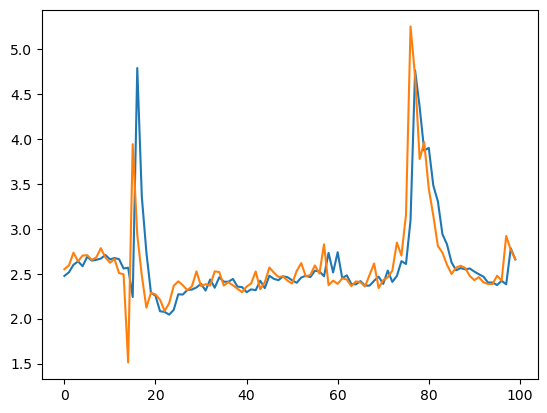

In [321]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [322]:
val_predictions=model13.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Validation Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

184/184 [==============================] - 1s 3ms/step


,Validation Predictions,Actuals
0,3.913493,3.87852
1,3.877593,3.96912
2,3.930873,4.00077
3,3.950570,3.96228
4,3.939888,4.00321
...,...,...
5853,3.999636,3.94941
5854,3.938104,3.95147
5855,3.944351,2.62340
5856,3.463652,1.76100


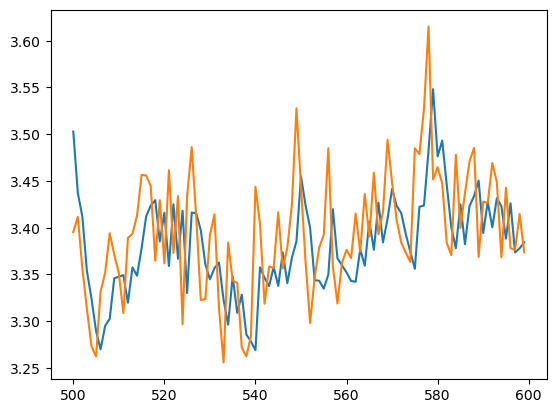

In [323]:
plt.plot(val_results["Validation Predictions"][500:600])
plt.plot(val_results["Actuals"][500:600])

In [324]:
test_predictions=model13.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

184/184 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,5.444310,5.32623
1,4.919601,4.84471
2,4.522832,4.52992
3,4.318766,4.36197
4,4.152494,3.67624
...,...,...
5855,4.505756,4.53544
5856,4.507521,4.50937
5857,4.487100,4.41924
5858,4.422513,4.49352


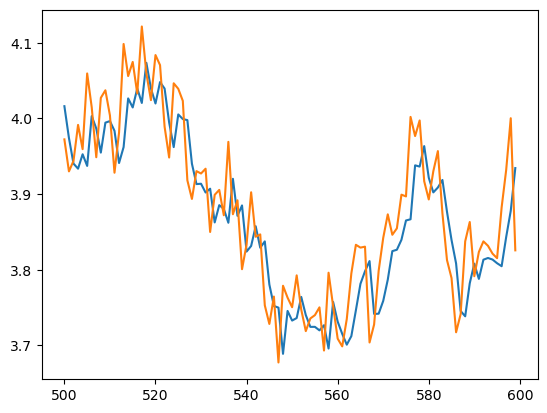

In [325]:
plt.plot(test_results["Train Predictions"][500:600])
plt.plot(test_results["Actuals"][500:600])

In [326]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.10392342597982188
MAE - Validation: 0.11619051167492984
MAE - Test: 0.09493871851036412
MSE - Train: 0.09113708814074264
MSE - Validation: 0.18029595617844463
MSE - Test: 0.10626147642337669
RMSE - Train: 0.30188919844993234
RMSE - Validation: 0.42461271316158755
RMSE - Test: 0.32597772381464457
R^2 Score - Train: 0.9106992747860884
R^2 Score - Validation: 0.6118969085120698
R^2 Score - Test: 0.660813307821724


# Model 14
## Model 13 but another dataprocess(add 3 sigma)

In [328]:
df_x_vrms=new_df_brs["xVRMS"]

In [329]:
len(df_x_vrms)

84542

In [330]:
df_x_vrms.isnull().sum()

3

In [331]:
df_x_vrms=df_x_vrms.fillna(df_x_vrms.mean())

In [332]:
df_x_vrms.isnull().sum()

0

In [333]:
df_x_vrms.index = pd.to_datetime(new_df_brs["time"])

In [335]:
df_x_vrms.tail()

time
2023-04-24 21:10:00    4.53544
2023-04-24 21:15:00    4.50937
2023-04-24 21:20:00    4.41924
2023-04-24 21:25:00    4.49352
2023-04-24 21:30:00    4.53100
Name: xVRMS, dtype: float64

In [336]:
df_x_vrms=clean_limit(df_x_vrms,low_limit=1)
len(df_x_vrms)

58599

In [337]:
Q1 = df_x_vrms.quantile(0.25)# değişken short landığında %25 inci değer
Q3 = df_x_vrms.quantile(0.75)
IQR = Q3-Q1

In [338]:
Q1 , Q3 , IQR

(2.756, 4.082495, 1.326495)

In [339]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [340]:
alt_sinir,ust_sinir

(0.7662574999999998, 6.0722375)

In [341]:
aykiri_df=(df_x_vrms < alt_sinir) | (df_x_vrms > ust_sinir)

In [342]:
len(aykiri_df)

58599

In [343]:
df_x_vrms[aykiri_df]

time
2022-07-04 13:10:00    6.16700
2022-07-09 10:10:00    6.65950
2022-07-09 22:55:00    7.67100
2022-07-11 10:15:00    6.46400
2022-07-20 13:15:00    7.19400
                        ...   
2023-04-20 22:00:00    7.31889
2023-04-20 22:05:00    6.69942
2023-04-20 22:10:00    6.09804
2023-04-22 19:30:00    6.89200
2023-04-24 10:20:00    6.35787
Name: xVRMS, Length: 540, dtype: float64

In [344]:
df_x_vrms[aykiri_df].drop

<bound method Series.drop of time
2022-07-04 13:10:00    6.16700
2022-07-09 10:10:00    6.65950
2022-07-09 22:55:00    7.67100
2022-07-11 10:15:00    6.46400
2022-07-20 13:15:00    7.19400
                        ...   
2023-04-20 22:00:00    7.31889
2023-04-20 22:05:00    6.69942
2023-04-20 22:10:00    6.09804
2023-04-22 19:30:00    6.89200
2023-04-24 10:20:00    6.35787
Name: xVRMS, Length: 540, dtype: float64>

In [345]:
len(df_x_vrms[aykiri_df])

540

In [346]:
len(df_x_vrms)

58599

In [347]:
df_x_vrms.isnull().sum()

0

In [348]:
df_x_vrms.tail()

time
2023-04-24 21:10:00    4.53544
2023-04-24 21:15:00    4.50937
2023-04-24 21:20:00    4.41924
2023-04-24 21:25:00    4.49352
2023-04-24 21:30:00    4.53100
Name: xVRMS, dtype: float64

In [349]:
df_x_vrms.isna()

time
2022-06-27 11:35:00    False
2022-06-27 11:40:00    False
2022-06-27 11:45:00    False
2022-06-27 11:55:00    False
2022-06-27 12:00:00    False
                       ...  
2023-04-24 21:10:00    False
2023-04-24 21:15:00    False
2023-04-24 21:20:00    False
2023-04-24 21:25:00    False
2023-04-24 21:30:00    False
Name: xVRMS, Length: 58599, dtype: bool

## 3 sigma

In [350]:
process_clm = df_x_vrms
process_clm_mean = process_clm.mean()
process_clm_std = process_clm.std()

up_limit = process_clm_mean + 3 * process_clm_std
low_limit = process_clm_mean - 3 * process_clm_std

process_clm_mean,process_clm_std,up_limit,low_limit

(3.5266175493335368, 0.978568357475562, 6.462322621760222, 0.5909124769068508)

In [351]:
df_x_vrms=clean_limit(df_x_vrms,low_limit=low_limit,up_limit=up_limit)

In [352]:
len(df_x_vrms)

58249

In [353]:
max_df=df_x_vrms.idxmax()

In [354]:
df_x_vrms[max_df]

6.46102

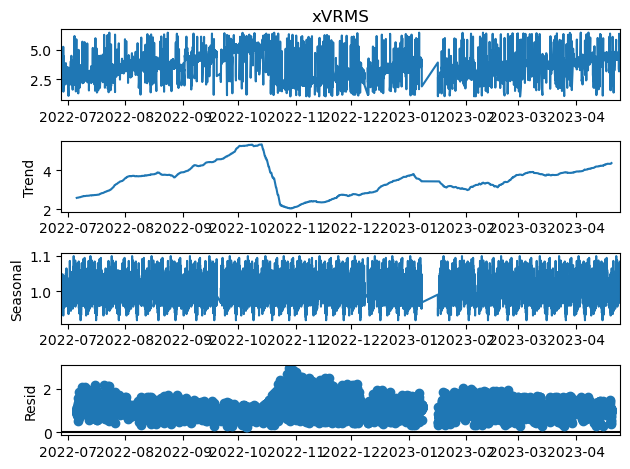

In [355]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_x_vrms, model='multiplicative',period=2036)
result.plot()
plt.show()

In [356]:
X,y =df_to_X_y(df_x_vrms,WINDOW_SIZE)
X.shape,y.shape

((58239, 10), (58239,))

In [357]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((46591, 10), (46591,), (5823, 10), (5823,), (5825, 10), (5825,))

In [358]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [359]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# Assuming X_train, X_val, and X_test are your input features
# Assuming y_train, y_val, and y_test are your target variables

# Create a MinMaxScaler object for the input features
scaler = MinMaxScaler()

# Fit the scaler on the training input features
scaler.fit(X_train)

# Apply normalization to the input features
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Rest of your code
model14 = Sequential()
model14.add(InputLayer((WINDOW_SIZE, 1)))
model14.add(LSTM(128, return_sequences=True))
model14.add(LSTM(64))
model14.add(Dropout(0.2))
model14.add(Dense(8, activation='relu'))
model14.add(Dense(1, activation='linear'))

# Compile the model
model14.compile(loss='mean_squared_error', optimizer='adam')

# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model using the normalized input features and target variables
model14.fit(X_train_normalized, y_train, epochs=10, validation_data=(X_val_normalized, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = model14.evaluate(X_test_normalized, y_test)

# Make predictions using the test set
y_pred = model14.predict(X_test_normalized)

# Perform any necessary inverse transformations on the predictions or further analysis

Epoch 1/10
1456/1456 [==============================] - 16s 10ms/step - loss: 0.2621 - val_loss: 0.1281
Epoch 2/10
1456/1456 [==============================] - 15s 11ms/step - loss: 0.1246 - val_loss: 0.0872
Epoch 3/10
1456/1456 [==============================] - 15s 10ms/step - loss: 0.1030 - val_loss: 0.0840
Epoch 4/10
1456/1456 [==============================] - 15s 10ms/step - loss: 0.0896 - val_loss: 0.0863
Epoch 5/10
1456/1456 [==============================] - 15s 10ms/step - loss: 0.0795 - val_loss: 0.0943
Epoch 6/10
1456/1456 [==============================] - 15s 11ms/step - loss: 0.0721 - val_loss: 0.0858
Epoch 7/10
1456/1456 [==============================] - 15s 10ms/step - loss: 0.0686 - val_loss: 0.0828
Epoch 8/10
1456/1456 [==============================] - 15s 10ms/step - loss: 0.0660 - val_loss: 0.0765
Epoch 9/10
1456/1456 [==============================] - 15s 10ms/step - loss: 0.0636 - val_loss: 0.0755
Epoch 10/10
183/183 [==============================] - 1s 4ms/st

In [360]:
train_predictions = model14.predict(X_train_normalized).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

1456/1456 [==============================] - 5s 3ms/step


,Train Predictions,Actuals
0,2.537788,2.55000
1,2.583990,2.59300
2,2.644799,2.73400
3,2.670806,2.63750
4,2.640133,2.70200
...,...,...
46586,4.012687,3.78872
46587,3.849906,3.73847
46588,3.761836,3.79186
46589,3.778401,3.67819


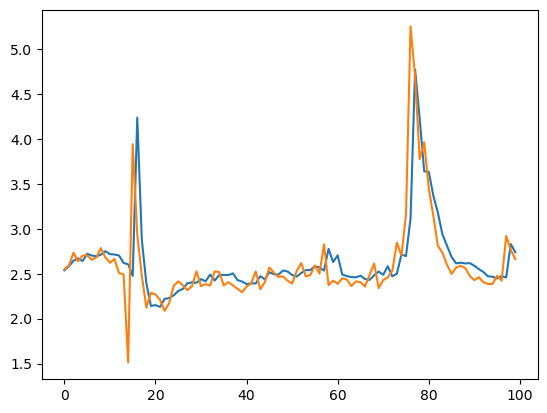

In [361]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [362]:
val_predictions=model14.predict(X_val_normalized).flatten()
val_results=pd.DataFrame(data={"Validation Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

182/182 [==============================] - 1s 3ms/step


,Validation Predictions,Actuals
0,3.805571,3.81646
1,3.825891,3.78432
2,3.804106,3.84871
3,3.832561,4.01990
4,3.954971,4.02672
...,...,...
5818,4.055774,4.00981
5819,4.013020,4.11471
5820,4.069674,4.02613
5821,4.036831,4.03413


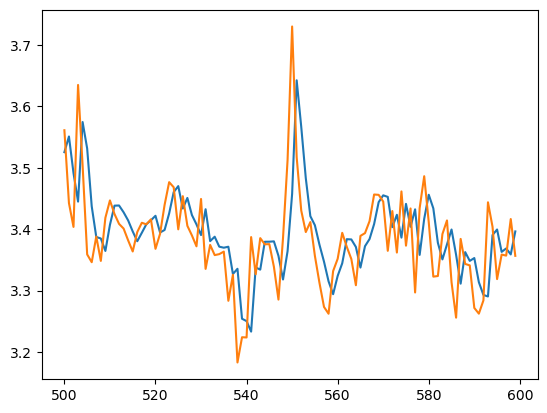

In [363]:
plt.plot(val_results["Validation Predictions"][500:600])
plt.plot(val_results["Actuals"][500:600])

In [364]:
test_predictions=model14.predict(X_test_normalized).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

183/183 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,4.018899,4.04984
1,4.035160,4.03620
2,4.033465,4.05415
3,4.042511,4.04369
4,4.039215,3.93851
...,...,...
5820,4.515929,4.53544
5821,4.512079,4.50937
5822,4.500258,4.41924
5823,4.432398,4.49352


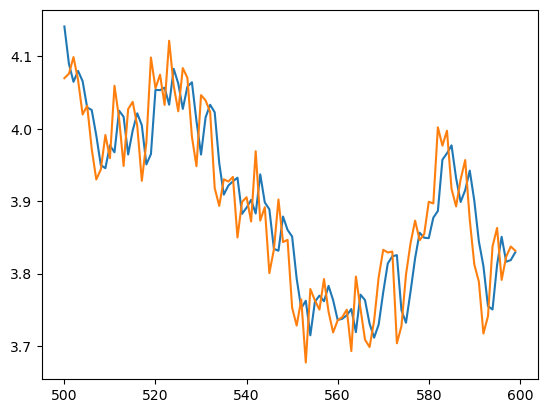

In [365]:
plt.plot(test_results["Train Predictions"][500:600])
plt.plot(test_results["Actuals"][500:600])

In [366]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelin tahminlerini alın
y_train_pred = train_predictions
y_val_pred = val_predictions
y_test_pred = test_predictions

# Regresyon metrikleri

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# R Squared (R^2) Score
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdırma
print("Regression Metrics:")
print("MAE - Train:", mae_train)
print("MAE - Validation:", mae_val)
print("MAE - Test:", mae_test)
print("MSE - Train:", mse_train)
print("MSE - Validation:", mse_val)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Validation:", rmse_val)
print("RMSE - Test:", rmse_test)
print("R^2 Score - Train:", r2_train)
print("R^2 Score - Validation:", r2_val)
print("R^2 Score - Test:", r2_test)



Regression Metrics:
MAE - Train: 0.0972076463318815
MAE - Validation: 0.09745517558701032
MAE - Test: 0.08280918410742764
MSE - Train: 0.05468815913471985
MSE - Validation: 0.07437265509983244
MSE - Test: 0.051567374554711005
RMSE - Train: 0.23385499595843542
RMSE - Validation: 0.2727135036990879
RMSE - Test: 0.227084509719864
R^2 Score - Train: 0.9414921774332967
R^2 Score - Validation: 0.6477184825996611
R^2 Score - Test: 0.7008312357379451
